In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.rcParams['figure.dpi']= 300  #resolution

In [2]:
def draw_list(ts_list, attribute, ts_number=1000, time = None , xlabel = None, formatter = None):
    if ts_number >= len(ts_list): ts_number = len(ts_list)-1
    fig = plt.figure()
    ax = fig.subplots()
    for ts in ts_list[:ts_number]:
        if time == None: index = list(ts.index.values)
        else: index= ts[time]
        ax.plot(index, ts[attribute])
    ax.set_ylabel(attribute)
    if formatter !=None:
        date_form = DateFormatter(formatter)
        ax.xaxis.set_major_formatter(date_form)
    if xlabel != None:
        ax.set_xlabel(xlabel)
    plt.show()

# Data definition

## Data Import 
I have the first week *week1* and the second, *week2*, both composed by the records from thursday (00:00) to monday(23:59). Time series ofrange of a week are extracted in three lsit: *wee1_list* , *week2_list*, and the union ov the previous: ***week_list***.

Each one is composed by four days: thu1, fri1, sat1, sun1, mon1 (and so the second).
We can extract a list of time series, all of range of a day: ***day_list***.

Then for each one of thi time series, we can extract different part of the days, splitting the ts in 2, 4 or 4 parts.
All this relatively small time series are in the list ***day_split***


For each one of these are saved different attribute and als the date, this give us the possibility to access values for classification in a second time. 
Additive columns for time can be setted and can be usefull for graphical rapresetnation. An example is the column 'time' in day_list, that save the hour but not the date.

In [3]:
time_col = 'date'

attributes = ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']


df=pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/datatraining.txt')
df[time_col] =  pd.to_datetime(df[time_col], format = '%Y-%m-%d %H:%M:%S')
df['Weekday']=df[time_col].apply(lambda x:x.weekday())
print(df.date)
mon1=df[df['Weekday']==0][attributes].copy()
tue1=df[df['Weekday']==1][attributes].copy()  #missing part of the day
wed1=df[df['Weekday']==2][attributes].copy() #incompleted too
thu1=df[df['Weekday']==3][attributes].copy()
fri1=df[df['Weekday']==4][attributes].copy()
sat1=df[df['Weekday']==5][attributes].copy()
sun1=df[df['Weekday']==6][attributes].copy()
    
weekdays1 = [thu1,fri1,sat1,sun1,mon1] #I dont want incompleted days, so wednesday and tuesday are excluded



df=pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/datatest2.txt')
df[time_col] =  pd.to_datetime(df[time_col], format = '%Y-%m-%d %H:%M:%S')
df['Weekday']=df[time_col].apply(lambda x:x.weekday())
print(df.date)
mon2=df[df['Weekday']==0][attributes].copy()
tue2=df[df['Weekday']==1][attributes].copy()  #missing part of the day
wed2=df[df['Weekday']==2][attributes].copy() #incompleted too
thu2=df[df['Weekday']==3][attributes].copy()
fri2=df[df['Weekday']==4][attributes].copy()
sat2=df[df['Weekday']==5][attributes].copy()
sun2=df[df['Weekday']==6][attributes].copy()
    
weekdays2 = [thu2,fri2,sat2,sun2,mon2] #I dont want incompleted days, so wednesday and tuesday are excluded

        


1      2015-02-04 17:51:00
2      2015-02-04 17:51:59
3      2015-02-04 17:53:00
4      2015-02-04 17:54:00
5      2015-02-04 17:55:00
               ...        
8139   2015-02-10 09:29:00
8140   2015-02-10 09:29:59
8141   2015-02-10 09:30:59
8142   2015-02-10 09:32:00
8143   2015-02-10 09:33:00
Name: date, Length: 8143, dtype: datetime64[ns]
1      2015-02-11 14:48:00
2      2015-02-11 14:49:00
3      2015-02-11 14:50:00
4      2015-02-11 14:51:00
5      2015-02-11 14:51:59
               ...        
9748   2015-02-18 09:15:00
9749   2015-02-18 09:16:00
9750   2015-02-18 09:16:59
9751   2015-02-18 09:17:59
9752   2015-02-18 09:19:00
Name: date, Length: 9752, dtype: datetime64[ns]


### week_list

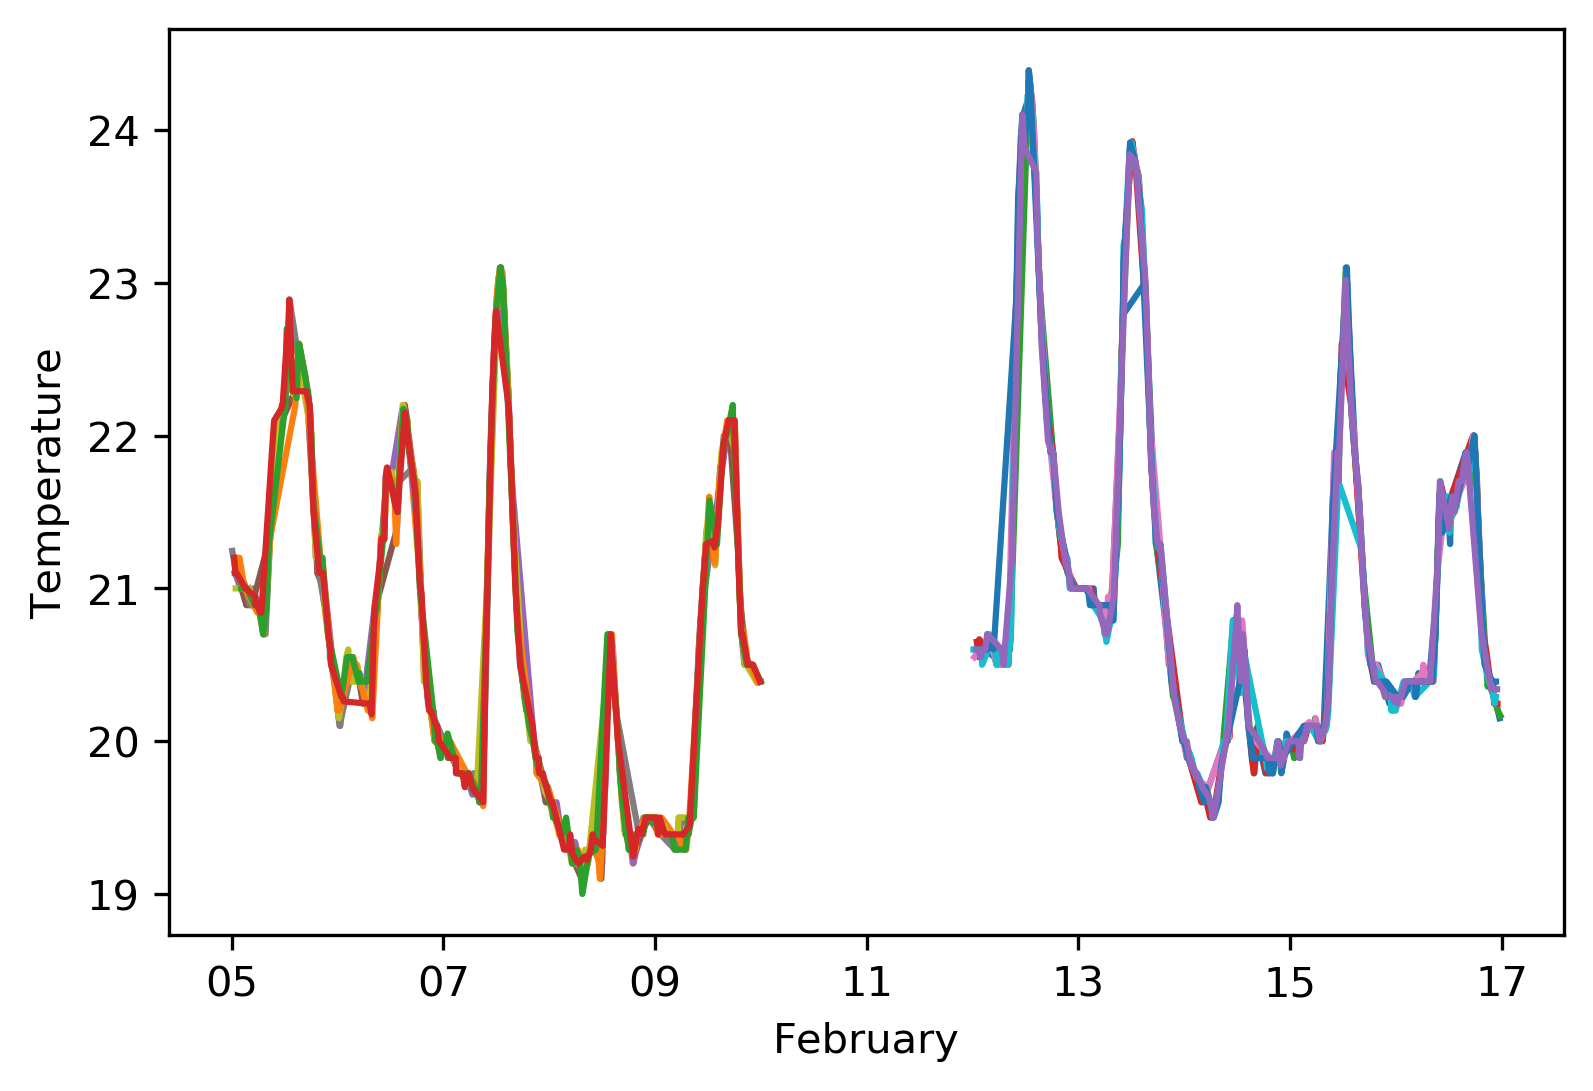

In [4]:
week_size = 144
week_list = []

week1 = pd.DataFrame()
for day in weekdays1:
    day.sort_values(time_col, inplace=True)#first of all: order
    week1 = week1.append(day, ignore_index=True )    ##a week

week1_list = []
tmp = week1.copy() 
while(len(tmp)>=week_size):
    ts = tmp.sample(week_size)
    ts.sort_values(time_col, inplace=True)
    week1_list.append(ts)
    week_list.append(ts)
    tmp.drop(ts.index, axis=0, inplace=True) #remove the sample just extract

    
week2 = pd.DataFrame()
for day in weekdays2:    
    day.sort_values(time_col, inplace=True)#first of all: order
    week2 = week2.append(day, ignore_index=True)    ##a week
    
week2_list = []
tmp = week2.copy() 
while(len(tmp)>=week_size):
    ts = tmp.sample(week_size)
    ts.sort_values(time_col, inplace=True)
    week2_list.append(ts)
    week_list.append(ts)
    tmp.drop(ts.index, axis=0, inplace=True) #remove the sample just extract


random.shuffle(week_list)
draw_list(week_list, 'Temperature', 15, time = time_col , xlabel = 'February', formatter = '%d')

### day_list

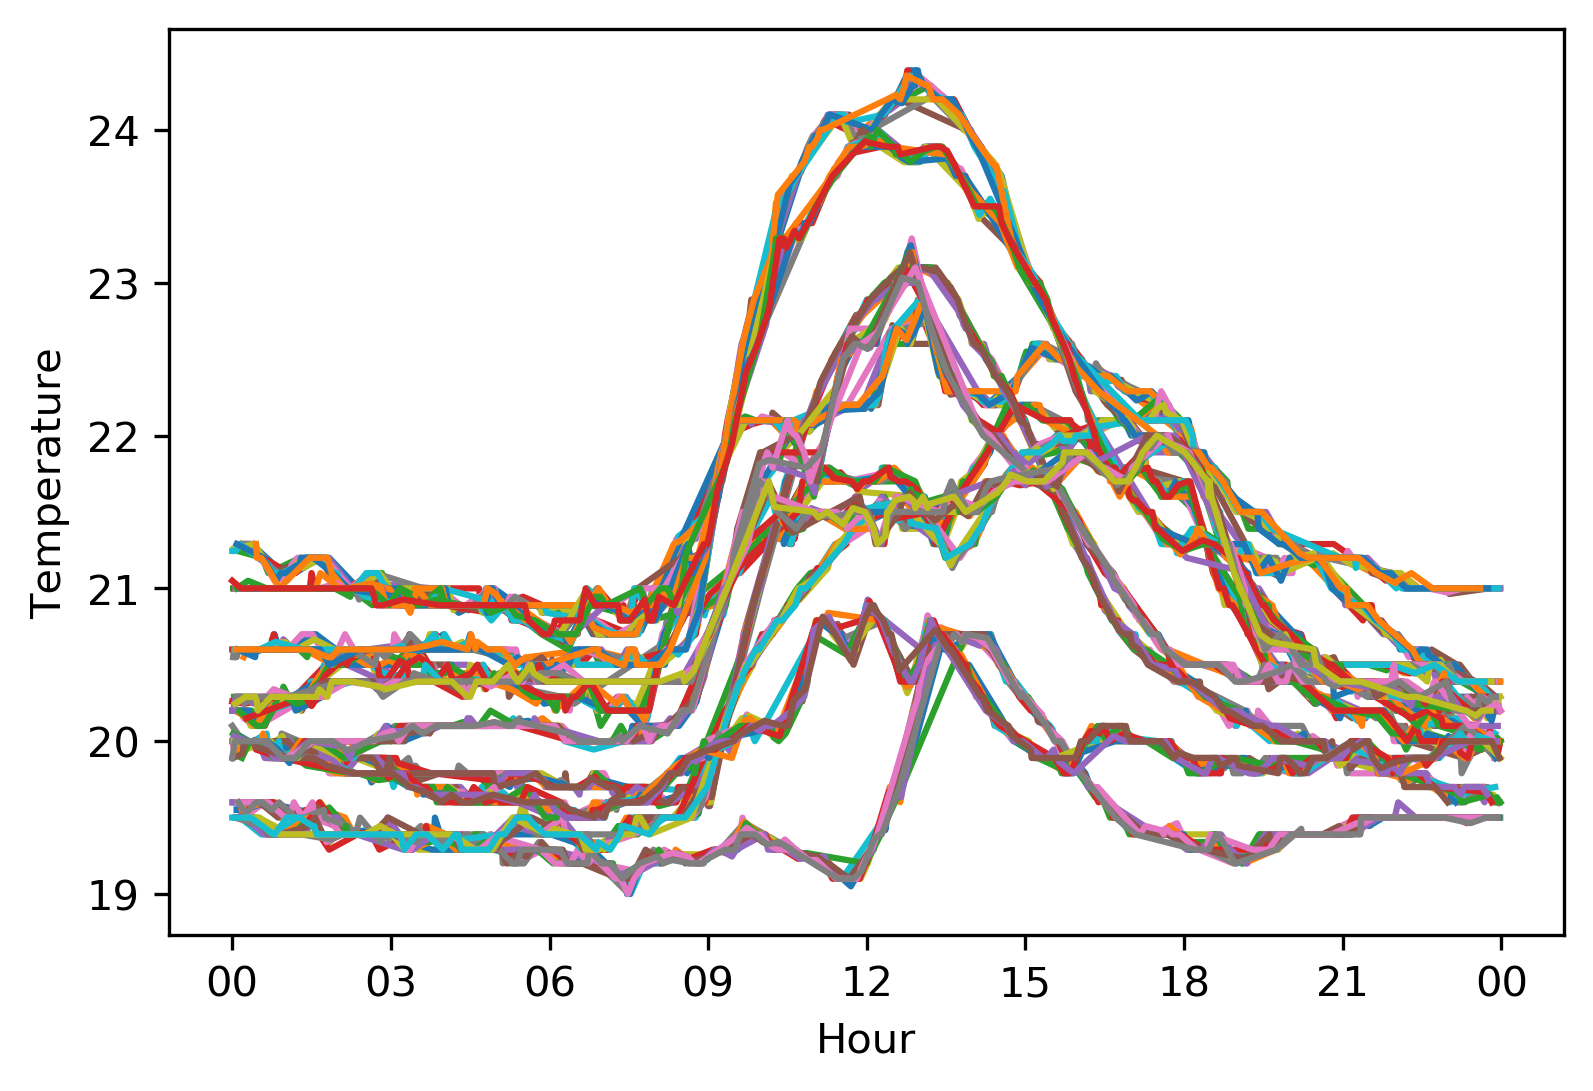

In [5]:
day_list = []
day_size = 120

day1_list=[]
for day in weekdays1:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= day_size):
        day_copy['time']=day_copy[time_col].apply(lambda x: str(x)[11:19]) #get string %H:%M:%S and lose info about the daydate
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  #now a date is setted automaticaly for all records
        ts=day_copy.sample(day_size)
        ts.sort_values('time', inplace=True) #necessary to order to be sure
        day_list.append(ts)
        day1_list.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) #remove the sample just extra


day2_list = []
for day in weekdays2:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= day_size):
        day_copy['time']=day_copy[time_col].apply(lambda x: str(x)[11:19]) #get string %H:%M:%S and lose info about the daydate
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  #now a date is setted automaticaly for all records
        ts=day_copy.sample(day_size)
        ts.sort_values('time', inplace=True) #necessary to order to be sure
        day_list.append(ts)
        day2_list.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) #remove the sample just extract


draw_list(day_list, 'Temperature', time = 'time', xlabel = 'Hour', formatter = '%H')

### day_split

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


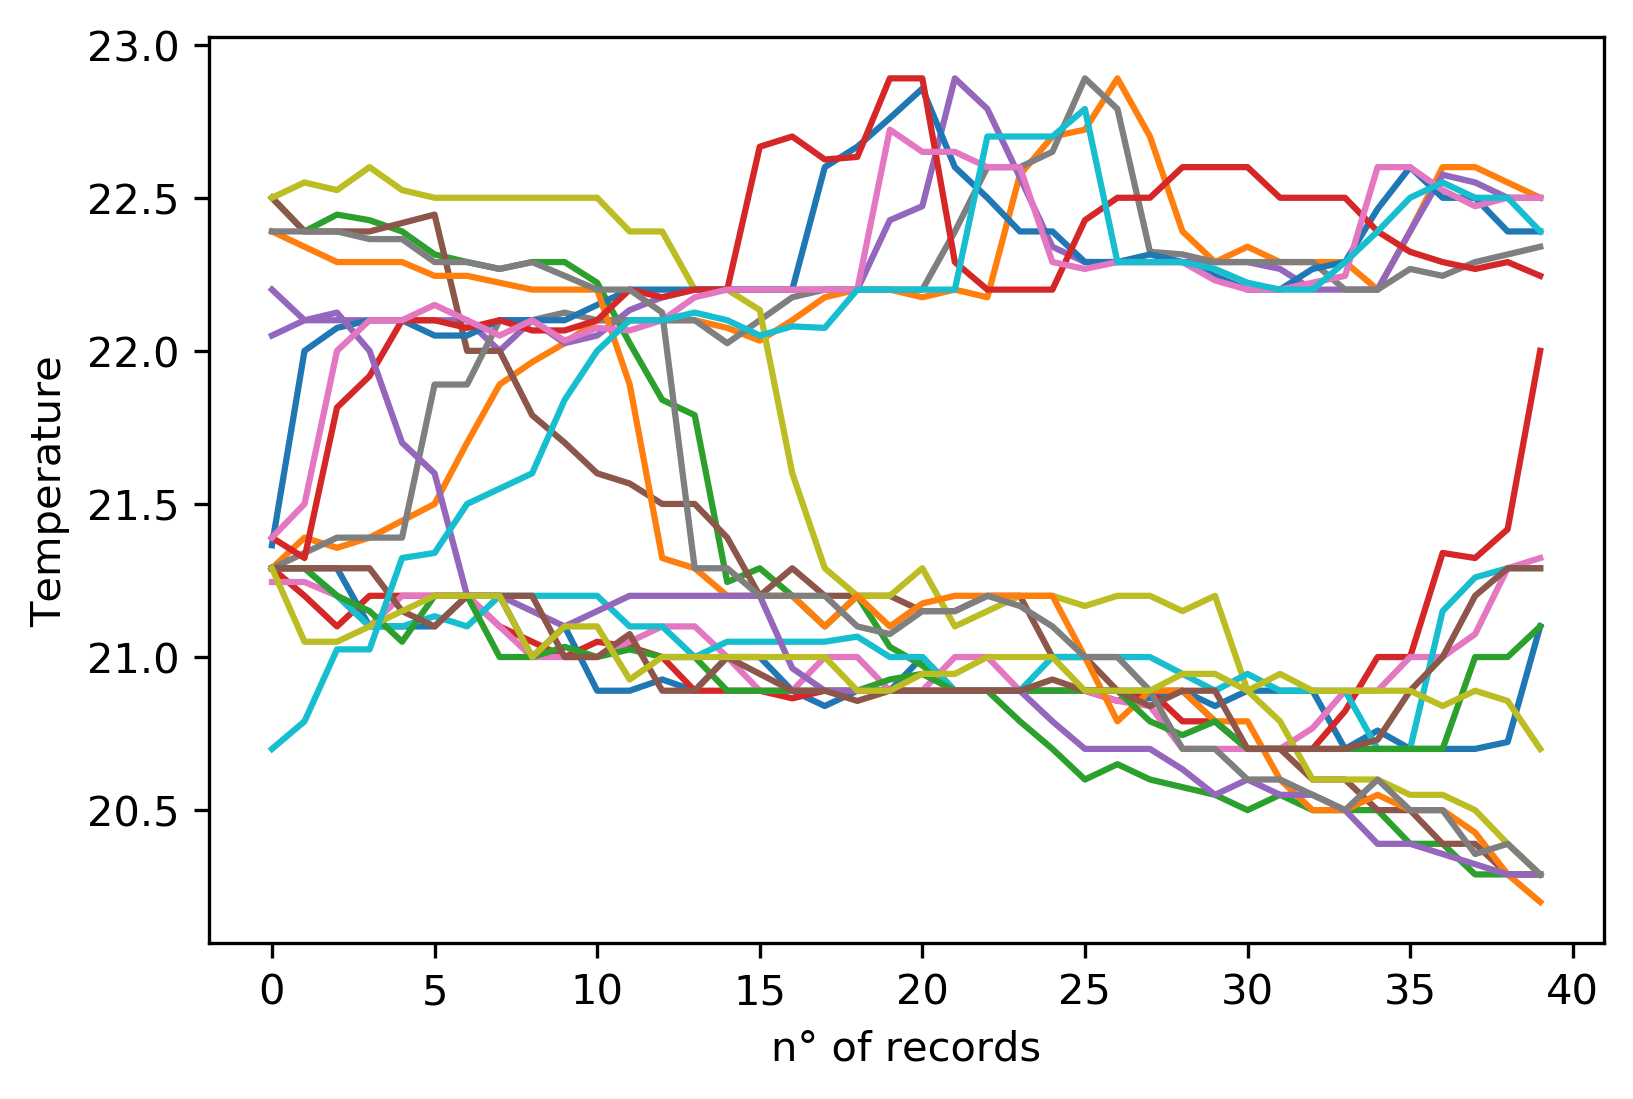

In [6]:
splits = 3 #night #morning #afternoon #evening 
part_size = day_size // splits
day_split = []

day1_split = []
for ts in day1_list:
    copy= ts.copy()
    for i in range(splits):
        day_part = copy[part_size*i:part_size*(i+1)]
        day_part['part'] = i    #saving the part of the days
        day_split.append(day_part)
        day1_split.append(day_part)
    
day2_split = []
for ts in day2_list:
    copy= ts.copy()
    for i in range(splits):
        day_part = copy[part_size*i:part_size*(i+1)]
        day_part['part'] = i    #saving the part of the days
        day_split.append(day_part)
        day2_split.append(day_part)

for day in day1_split:
    day.reset_index(drop=True, inplace=True)  
for day in day2_split:
    day.reset_index(drop=True, inplace=True)  
for day in day_split:
    day.reset_index(drop=True, inplace=True)    


    
draw_list(day_split,  'Temperature', 20, xlabel = 'n° of records')



Text(0, 0.5, 'Temperature')

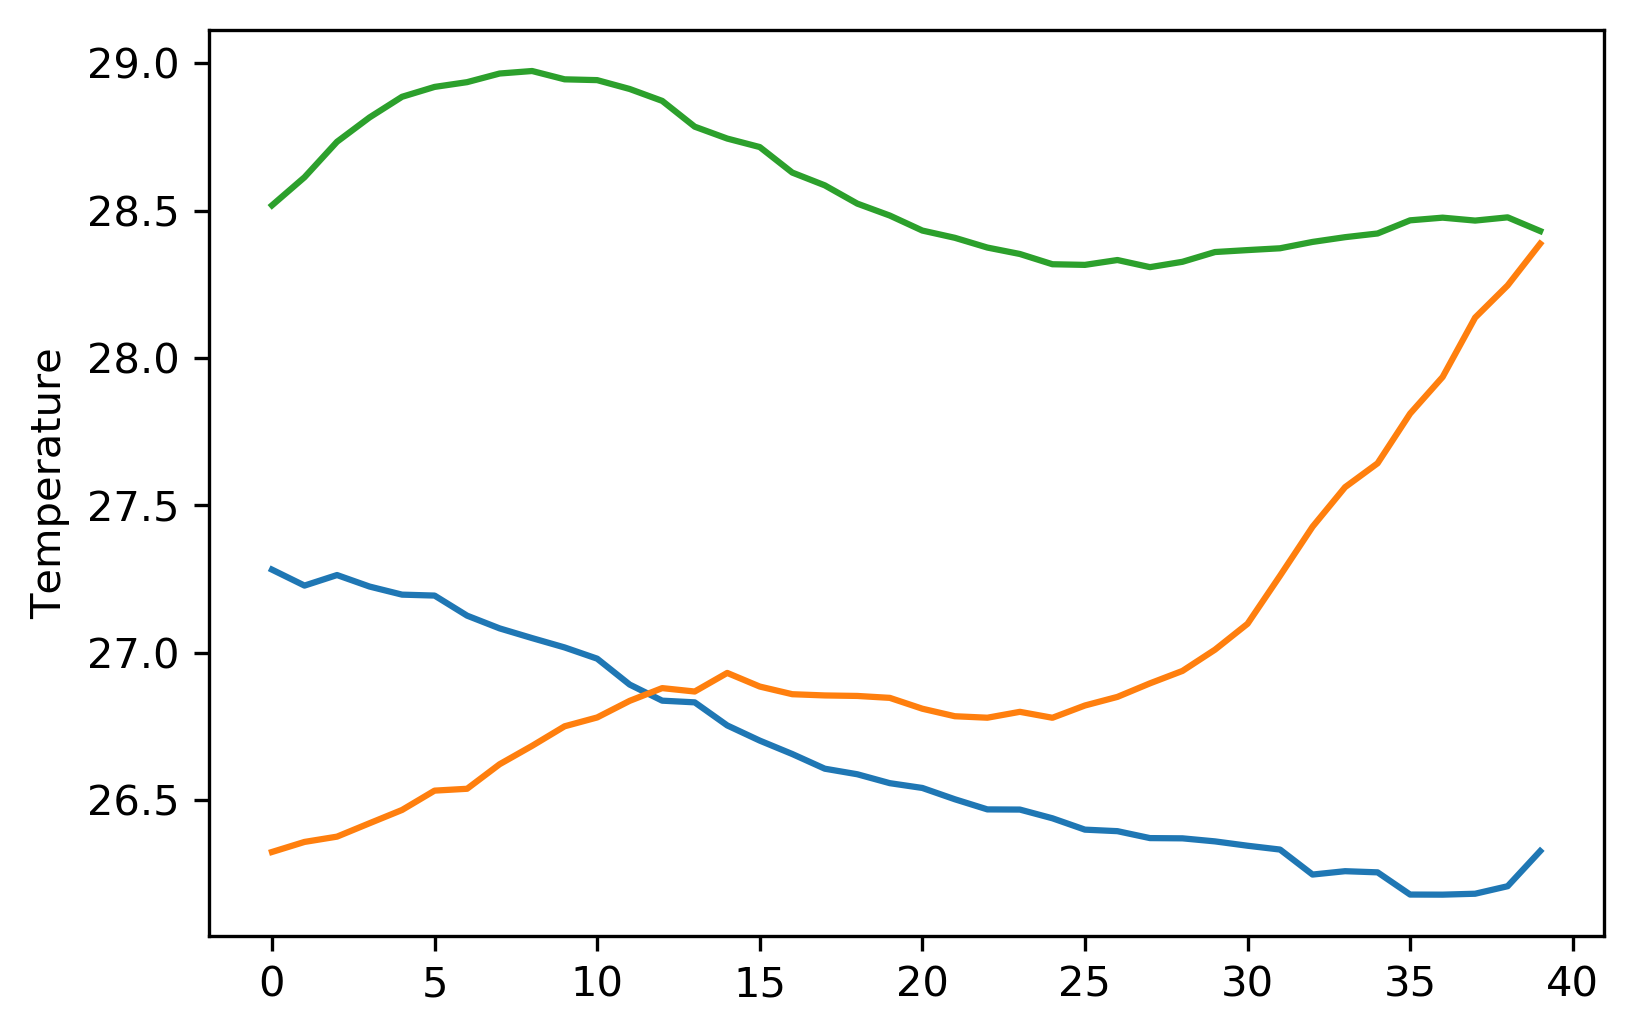

In [7]:
def daypart(ts): 
     if ts['date'][ts.index[ts_size//2]].hour < 8 : return 'night'  
     elif ts['date'][ts.index[ts_size//2]].hour < 16 : return 'morning'
     else: return 'evening'
        
ts_list = []
for temp in day_split:
    ts = temp['Humidity'].copy()
    ts_list.append(ts)

ts_array = []
ts_size = len(day_split[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,))
    
ts_array = np.array(ts_array)
labels = [daypart(ts) for ts in day_split]
labels = np.array(labels)
for i in ['night','morning', 'evening']:
    plt.plot(np.mean(ts_array[np.where(labels == i)], axis=0))
    
plt.ylabel('Temperature')


# CLUSTERING

## Shape Based

#### Parts  of the day 

In [8]:
from tslearn.generators import random_walks
X = random_walks(n_ts=50, sz=32, d=1)
X.shape

(50, 32, 1)

In [9]:
ts_list = []
for temp in day_split:
    ts = temp['Light'].copy()
    ts_list.append(ts)

ts_array = []
ts_size = len(day_split[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size, 1))
    
ts_array = np.array(ts_array)

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
TimeSeriesScalerMeanVariance().fit_transform(ts_array)

def daypart(ts): 
     if ts['date'][ts.index[ts_size//2]].hour < 8 : return 'night'
     elif ts['date'][ts.index[ts_size//2]].hour < 16 : return 'morning'
     else: return 'evening'


labels = [daypart(ts) for ts in day_split]
ts_array.shape

(360, 40, 1)

In [10]:
ts_array

array([[[  0.        ],
        [  0.        ],
        [  0.        ],
        ...,
        [  0.        ],
        [419.        ],
        [419.        ]],

       [[433.        ],
        [429.        ],
        [429.        ],
        ...,
        [472.75      ],
        [449.5       ],
        [481.5       ]],

       [[449.5       ],
        [444.        ],
        [429.        ],
        ...,
        [  0.        ],
        [  0.        ],
        [  0.        ]],

       ...,

       [[  0.        ],
        [  0.        ],
        [  0.        ],
        ...,
        [ 14.        ],
        [ 14.        ],
        [399.        ]],

       [[422.33333333],
        [464.25      ],
        [449.        ],
        ...,
        [427.25      ],
        [419.        ],
        [411.5       ]],

       [[  0.        ],
        [  0.        ],
        [  0.        ],
        ...,
        [  0.        ],
        [  0.        ],
        [  0.        ]]])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


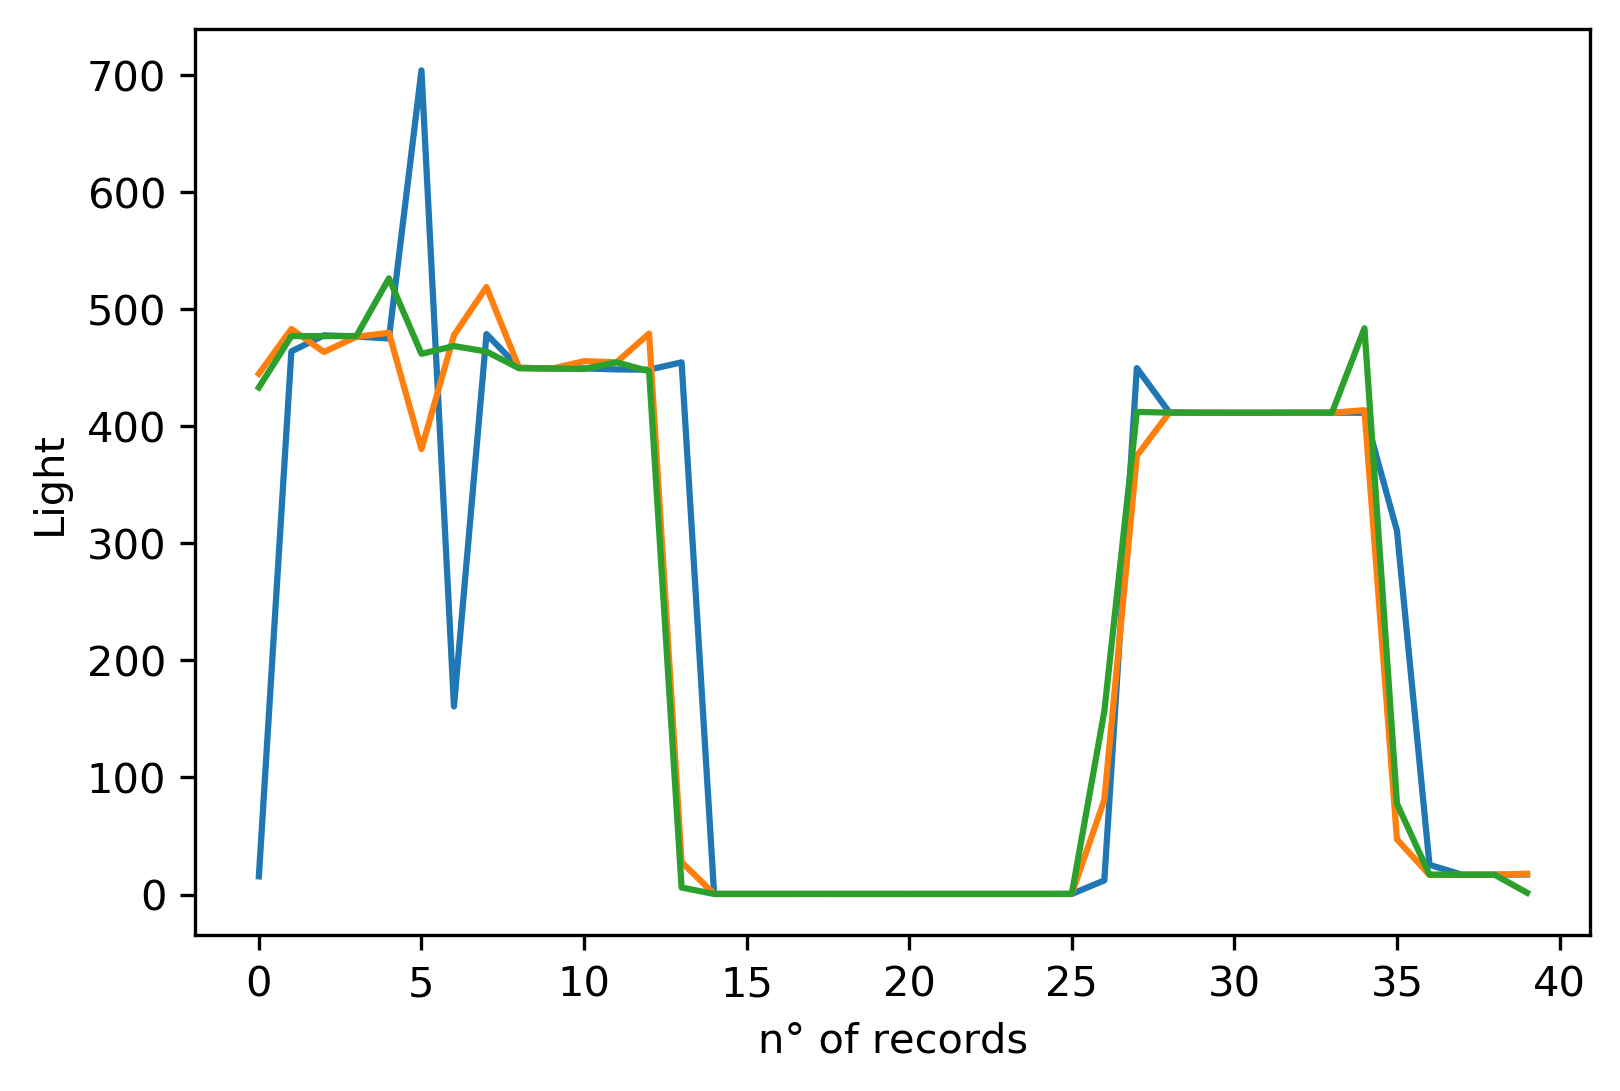

Class      0    1   2
Day part             
evening    0   52  68
morning   65   23  32
night     20  100   0

In [11]:
from tslearn.clustering import TimeSeriesKMeans


km = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
km.fit(ts_array)

plt.plot(km.cluster_centers_.reshape(ts_array.shape[1],3))
plt.ylabel('Light')
plt.xlabel('n° of records')

plt.show()
pd.crosstab(pd.Series(labels),pd.Series(km.labels_), colnames = ['Class'], rownames = ['Day part'])

Resumed because of empty cluster
0.295 --> 0.288 --> 0.292 --> 


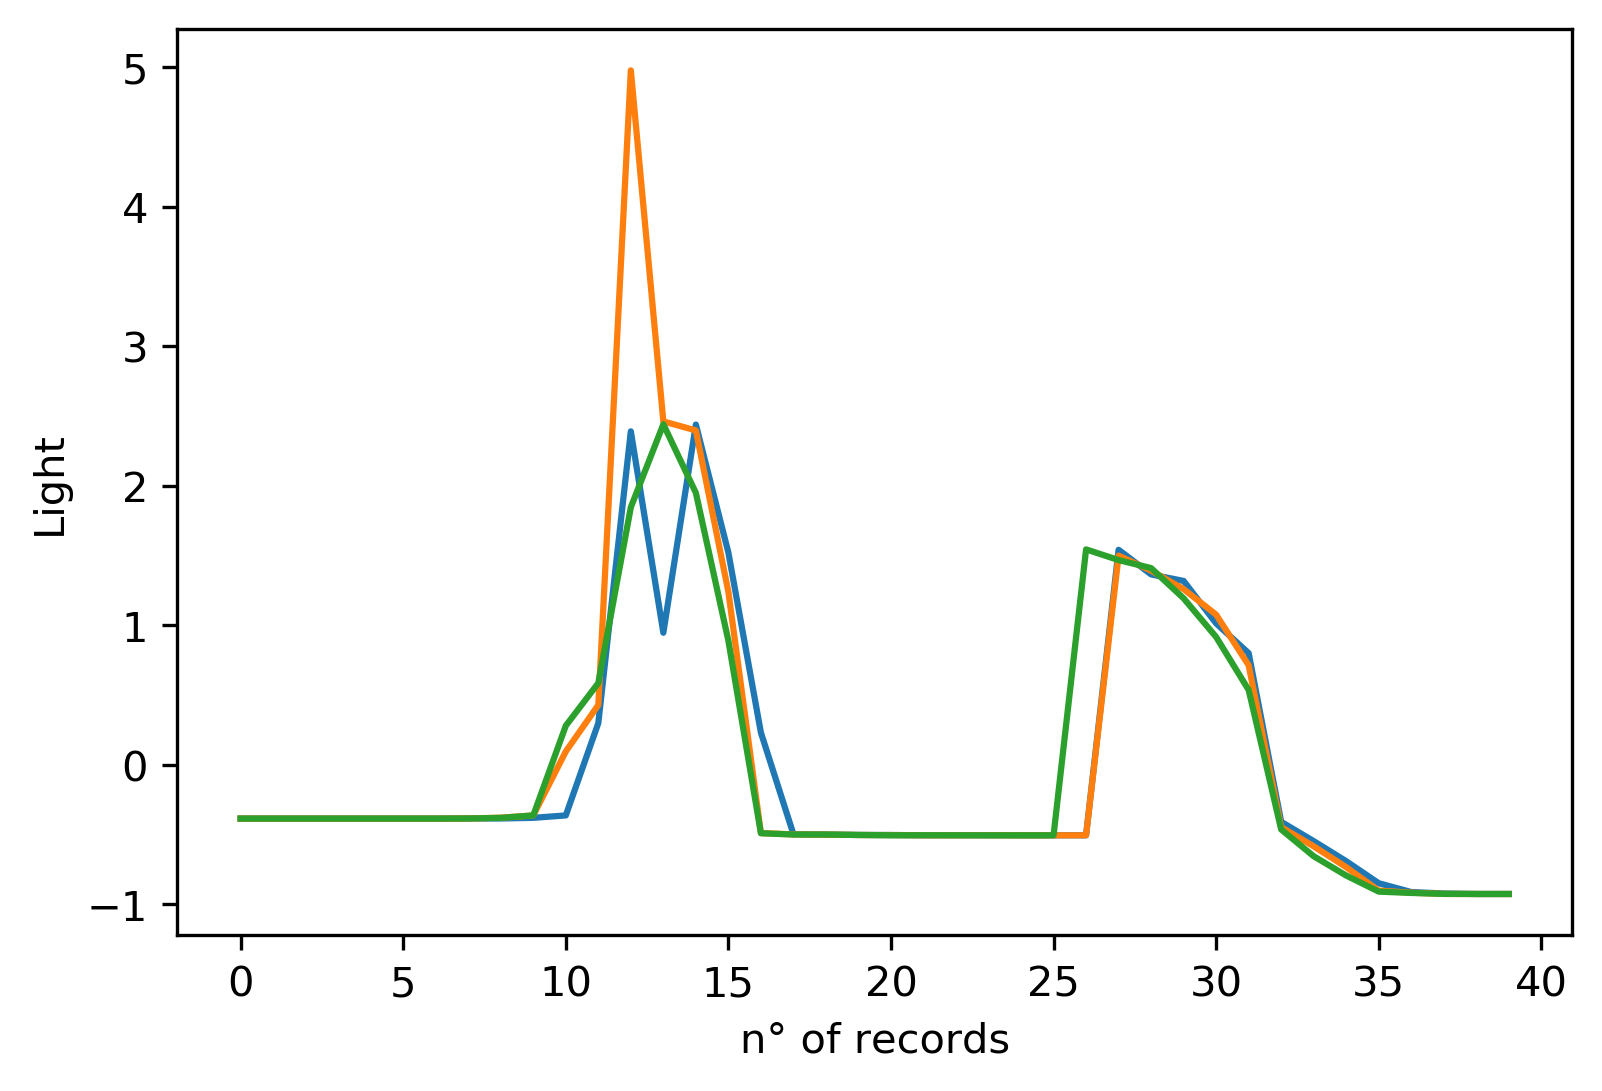

Class       0   1   2
Day part             
evening    24  74  22
morning    20  11  89
night     106  14   0

In [12]:
from tslearn.clustering import KShape
ks = KShape(n_clusters=3, verbose=True, random_state=0)
ks.fit(ts_array)


plt.plot(ks.cluster_centers_.reshape(ts_array.shape[1],3))
plt.ylabel('Light')
plt.xlabel('n° of records')
plt.show()
pd.crosstab(pd.Series(labels),pd.Series(ks.labels_), colnames = ['Class'], rownames = ['Day part'])

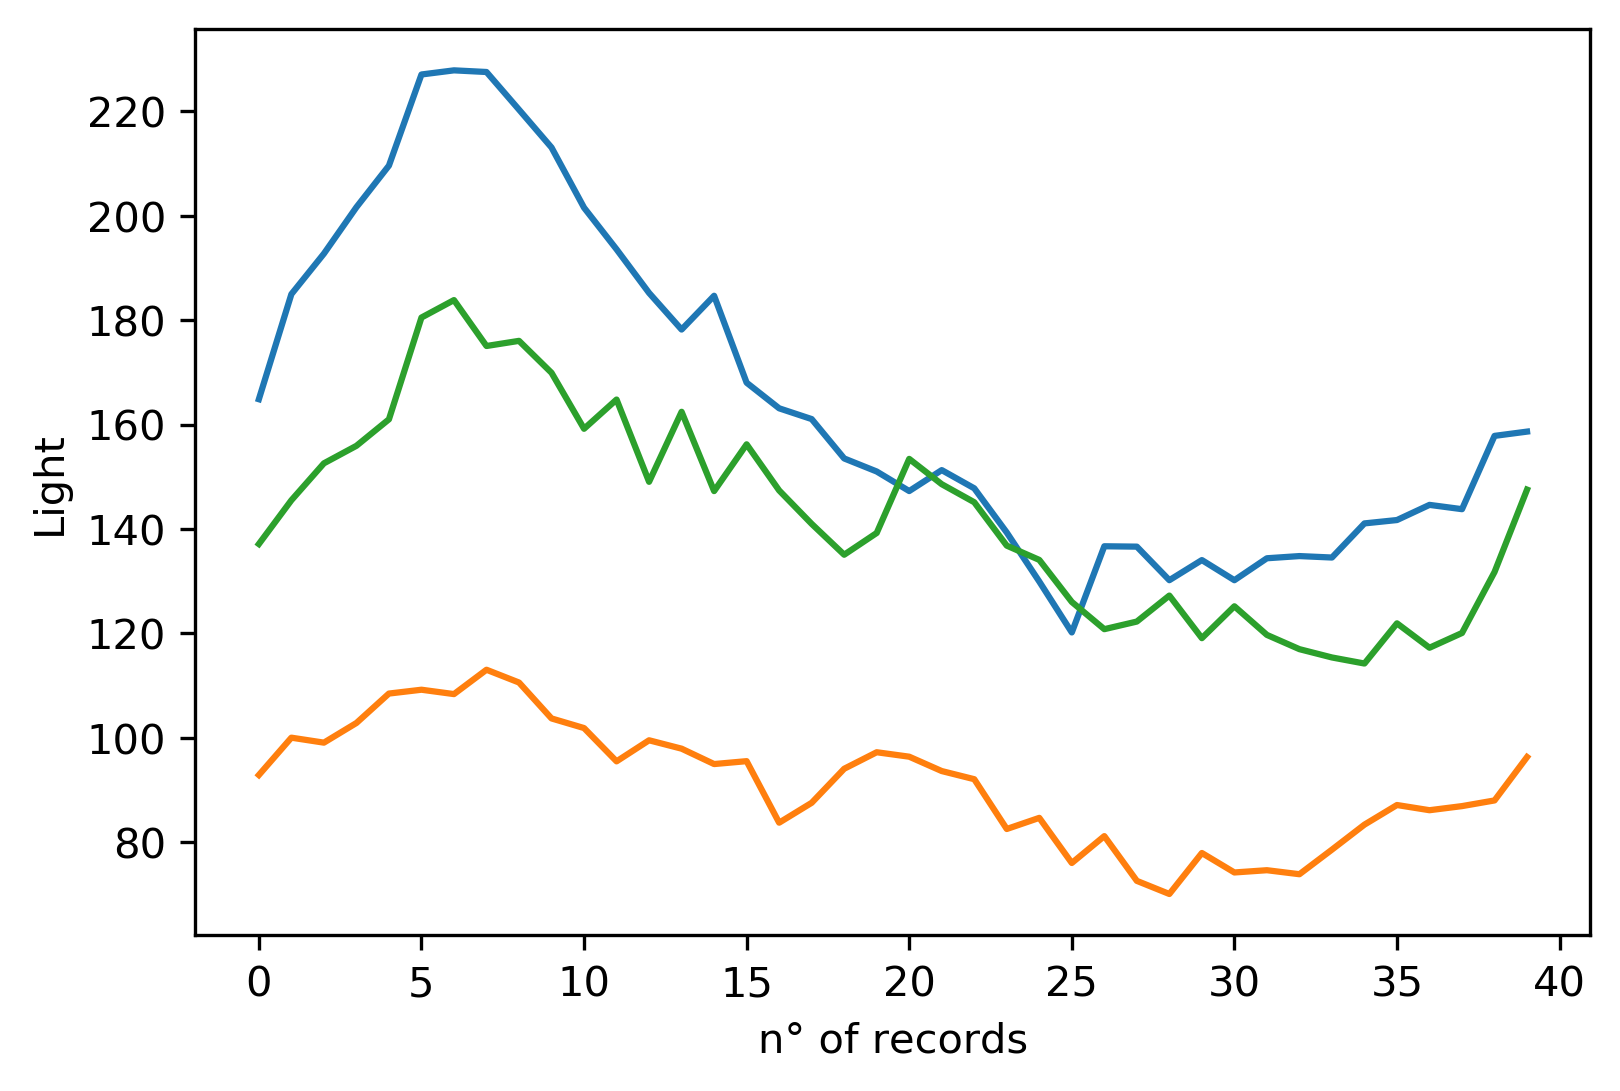

Class      0   1   2
Day part            
evening   46  48  26
morning   41  35  44
night     14  82  24

In [13]:
from tslearn.clustering import GlobalAlignmentKernelKMeans
km = GlobalAlignmentKernelKMeans(n_clusters=3, random_state=0)
km.fit(ts_array)

for i in range(3):
    plt.plot(np.mean(ts_array[np.where(km.labels_ == i)], axis=0))
    #plt.xticks([(ts_size/8 * i) for i in range(9)],[0,3,6,9,12,15,18,21,24])
plt.ylabel('Light')
plt.xlabel('n° of records')
plt.show()


pd.crosstab(pd.Series(labels),pd.Series(km.labels_),colnames = ['Class'], rownames = ['Day part'])

#### day length

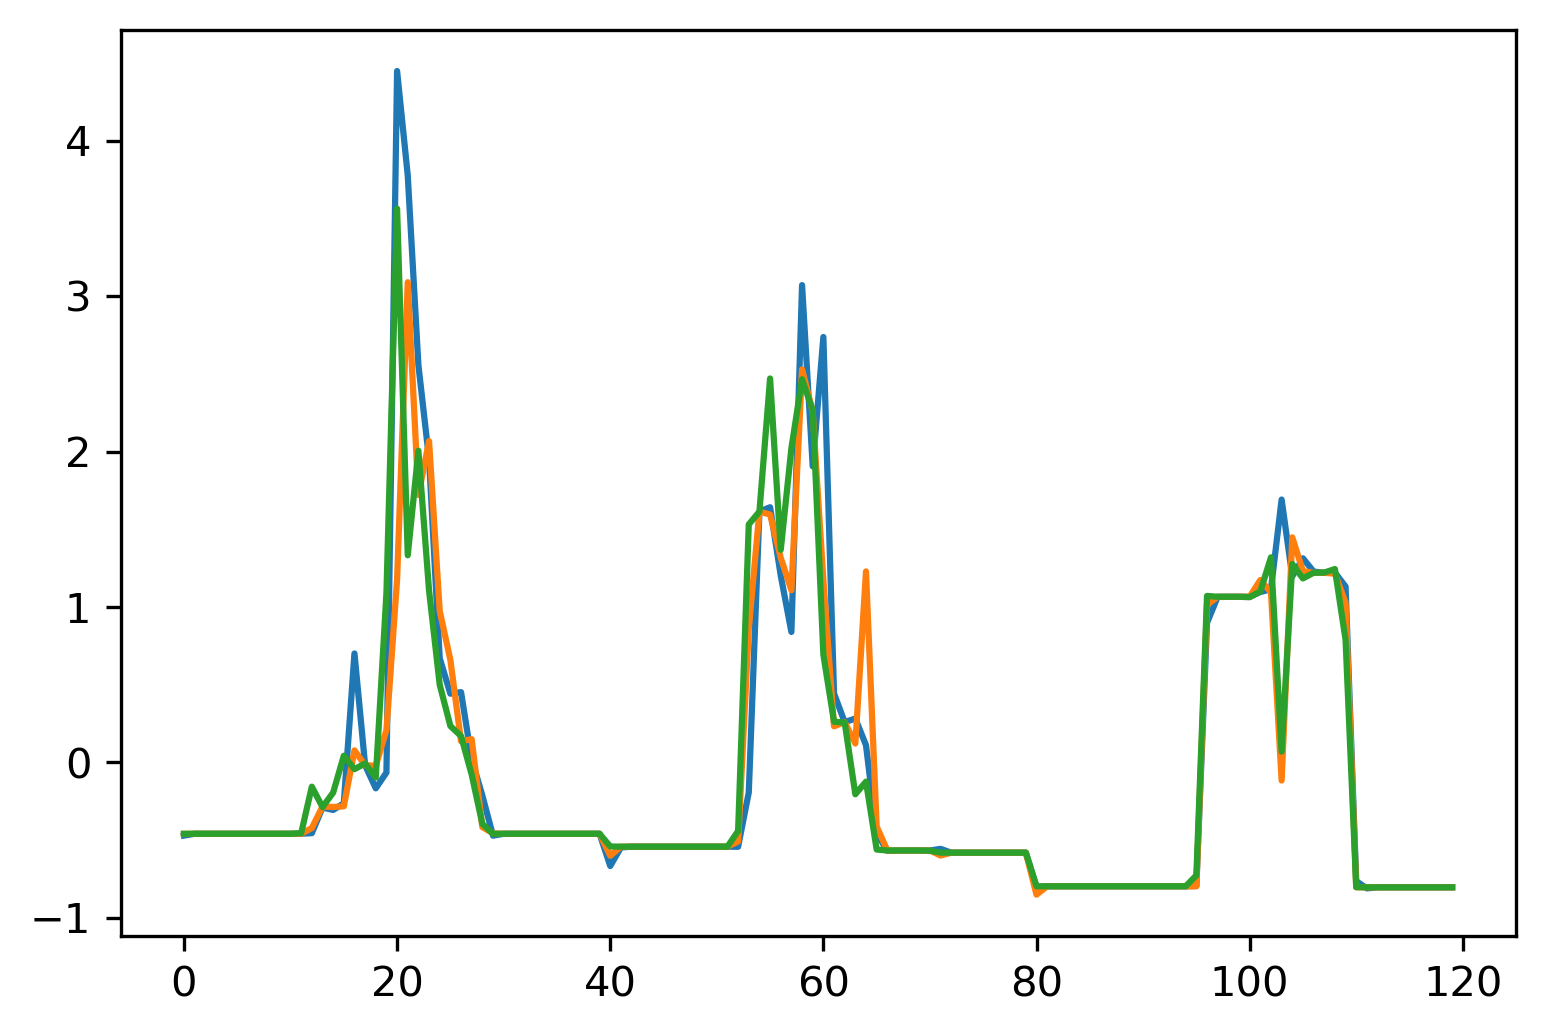

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 1 2 2 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2]


In [14]:
ts_list = []
for temp in day_list:
    ts = temp['Light'].copy()
    ts_list.append((ts-ts.mean())/ts.std())

ts_array = []
ts_size = len(day_list[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,1))
    
ts_array = np.array(ts_array)

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
TimeSeriesScalerMeanVariance().fit_transform(ts_array)

km = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5, random_state=0)
km.fit(ts_array)

plt.plot(km.cluster_centers_.reshape(ts_array.shape[1],3))
plt.show()
print(km.labels_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7260 out of 7260 | elapsed:    3.5s finished


Init 1
110.286 --> 89.630 --> 77.080 --> 72.931 --> 71.487 --> 71.294 --> 70.986 --> 70.986 --> 
Init 2
106.012 --> 89.675 --> 84.332 --> 78.223 --> 75.982 --> 73.689 --> 72.107 --> 71.294 --> 70.986 --> 70.986 --> 
Init 3
108.336 --> 87.208 --> 80.116 --> 78.219 --> 77.135 --> 77.160 --> 77.096 --> 76.195 --> 73.397 --> 71.621 --> 71.132 --> 70.986 --> 70.986 --> 
Init 4
104.591 --> 83.729 --> 77.976 --> 72.752 --> 71.652 --> 71.369 --> 71.015 --> 70.978 --> 70.978 --> 
Init 5
106.612 --> 83.500 --> 79.943 --> 79.561 --> 78.861 --> 78.692 --> 78.077 --> 77.252 --> 76.966 --> 77.134 --> 77.176 --> 77.160 --> 77.096 --> 76.195 --> 73.397 --> 71.621 --> 71.132 --> 70.986 --> 70.986 --> 
Init 6
108.032 --> 84.182 --> 78.566 --> 75.857 --> 71.562 --> 71.087 --> 70.978 --> 70.978 --> 
Init 7
107.797 --> 88.361 --> 82.513 --> 74.941 --> 72.787 --> 71.444 --> 71.015 --> 70.978 --> 70.978 --> 
Init 8
104.089 --> 83.224 --> 82.230 --> 81.488 --> 80.128 --> 76.721 --> 71.698 --> 71.087 --> 70.97

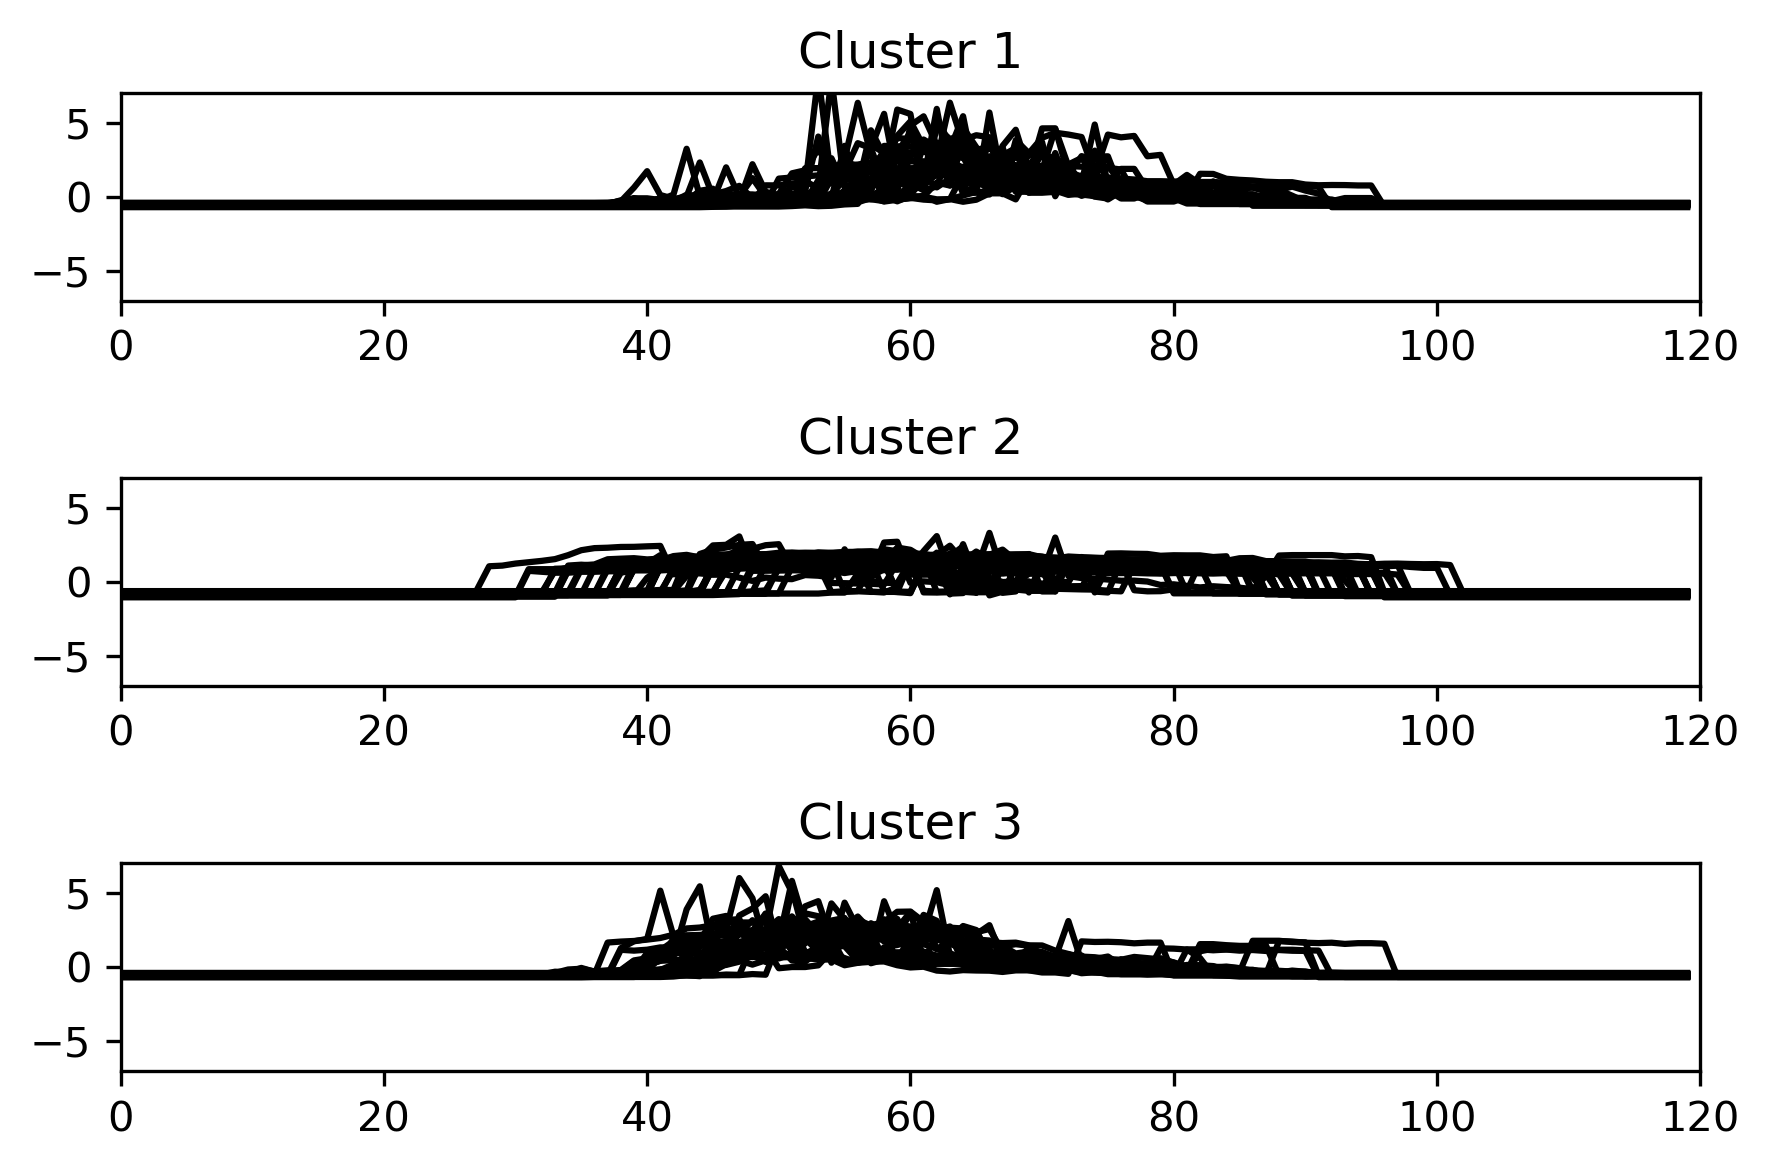

In [15]:
from tslearn.clustering import GlobalAlignmentKernelKMeans
from tslearn.metrics import sigma_gak
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
X_train = ts_array
sz = X_train.shape[1]
gak_km = GlobalAlignmentKernelKMeans(n_clusters=3,
                                     sigma=sigma_gak(X_train),
                                     n_init=20,
                                     verbose=True,
                                     random_state=0)
y_pred = gak_km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-")
    plt.xlim(0, sz)
    plt.ylim(-7, 7)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

## Feature Based

In [16]:
import numpy as np
import scipy.stats as stats

def calculate_features(ts):
    features = {
        'maxT': [np.max(ts['Temperature'])],
        'minT':[np.min(ts['Temperature'])],
        'avgT': [np.mean(ts['Temperature'])],
        'stdT': [np.std(ts['Temperature'])],
        'maxH': [np.max(ts['Humidity'])],
        'minH':[np.min(ts['Humidity'])],
        'avgH': [np.mean(ts['Humidity'])],
        'stdH': [np.std(ts['Humidity'])],
    
    }
    return features

#### Day length

In [17]:
ts_list = []
for temp in day_list:
    ts = temp[['Temperature','Humidity','time']].copy()
    ts_list.append(ts)


F = pd.DataFrame()
for ts in ts_list:
    F = F.append( pd.DataFrame.from_dict(calculate_features(ts)), ignore_index = True)
F 

maxT       minT       avgT      stdT       maxH    minH       avgH  \
0    22.890000  20.290000  21.447771  0.727398  28.293333  19.390  24.208261   
1    22.890000  20.290000  21.518583  0.684948  28.292500  19.290  24.294131   
2    22.890000  20.290000  21.563361  0.691808  28.390000  19.390  24.544375   
3    22.856667  20.200000  21.541514  0.685077  28.356667  19.245  24.361839   
4    22.890000  20.290000  21.400944  0.725765  28.317500  19.290  23.791806   
..         ...        ...        ...       ...        ...     ...        ...   
115  22.000000  20.200000  20.933493  0.648341  30.500000  24.290  28.136701   
116  22.000000  20.100000  20.812521  0.593184  30.600000  24.290  28.098687   
117  22.000000  20.150000  20.951160  0.633541  30.600000  24.290  28.231701   
118  22.000000  20.166667  20.862424  0.615815  30.600000  24.290  27.708458   
119  21.926667  20.166667  20.837646  0.584646  30.600000  24.290  28.367715   

         stdH  
0    2.248745  
1    2.343938  
2    2.449533  
3    2.429575  
4    2.616373  
..        ...  
115  1.885951  
116  1.931137  
117  1.922238  
118  1.973233  
119  1.915321  

[120 rows x 8 columns]

In [18]:
ts_array_T = []
ts_array_H = []
ts_size = len(ts_list[0])
for ts in ts_list:
    ts_array_T.append(np.array(ts['Temperature']).reshape(ts_size,))
    ts_array_H.append(np.array(ts['Humidity']).reshape(ts_size,))
ts_array_T = np.array(ts_array_T)
ts_array_H = np.array(ts_array_H)
ts_array_T.shape

(120, 120)

1879.0221752222774


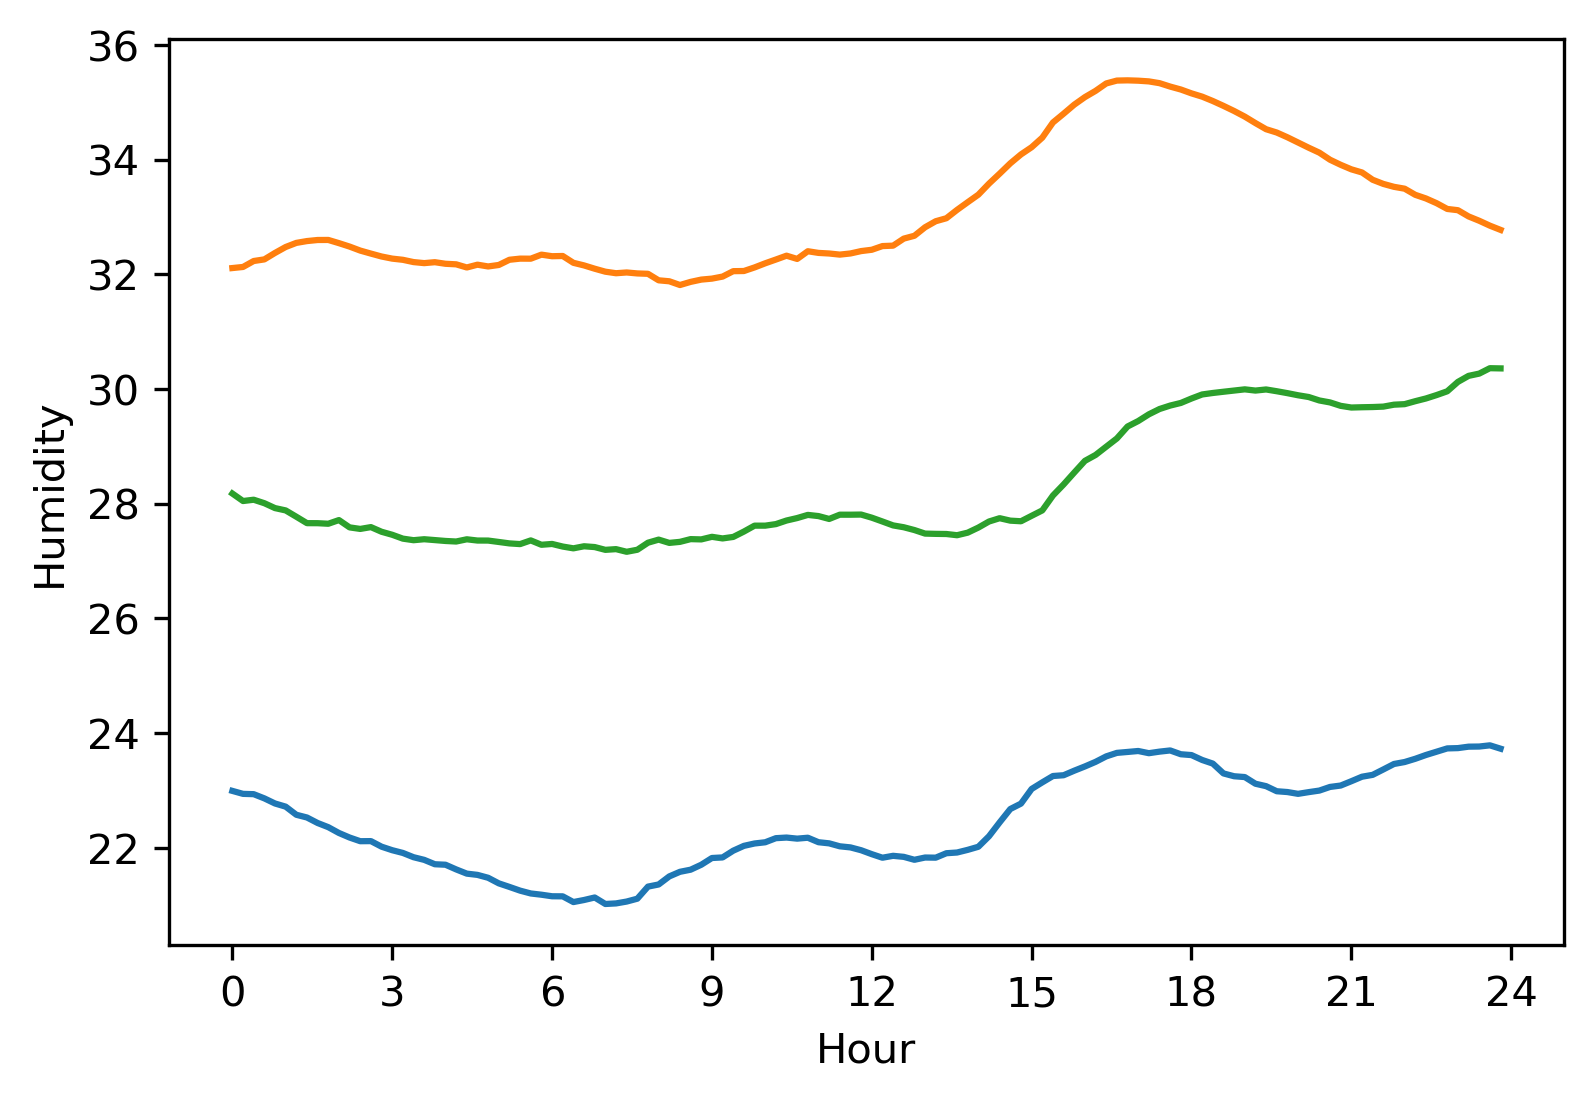

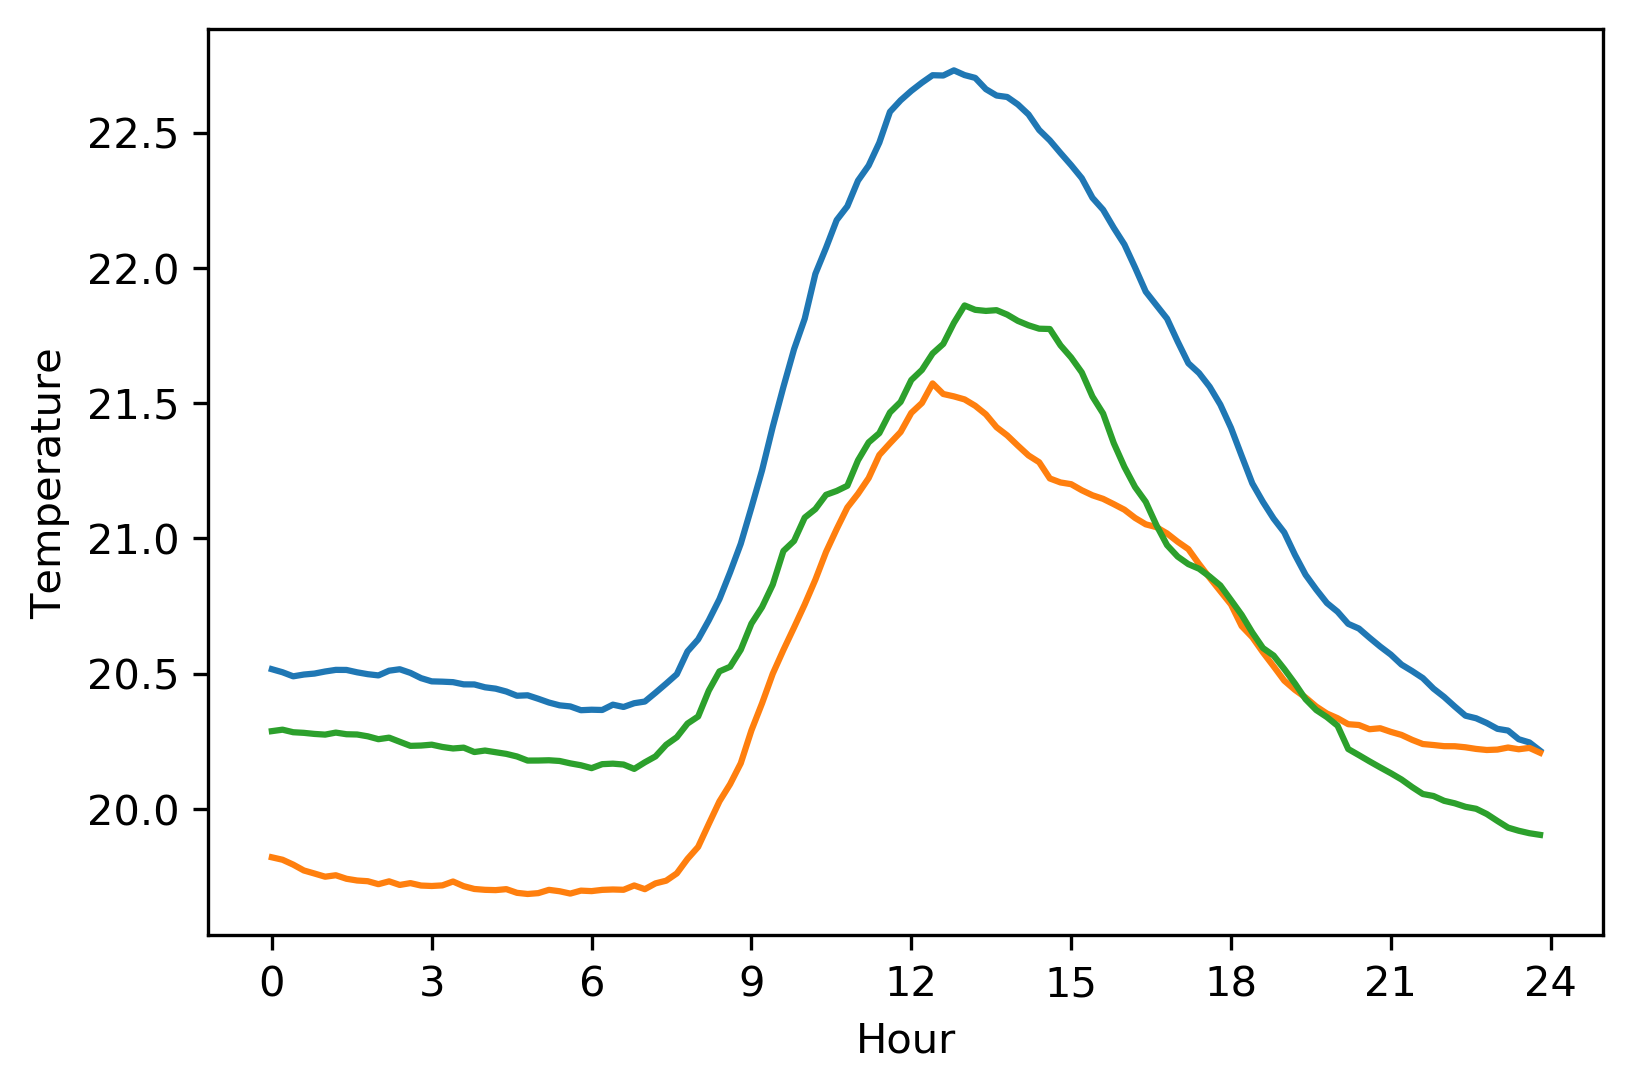

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2]


In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(F)

print(kmeans.inertia_)

for i in range(3):
    plt.plot(np.mean(ts_array_H[np.where(kmeans.labels_ == i)], axis=0))
    plt.xticks([(ts_size/8 * i) for i in range(9)],[0,3,6,9,12,15,18,21,24])
    plt.ylabel('Humidity')
    plt.xlabel('Hour')

plt.show()
for i in range(3):
    plt.plot(np.mean(ts_array_T[np.where(kmeans.labels_ == i)], axis=0))
    plt.xticks([(ts_size/8 * i) for i in range(9)],[0,3,6,9,12,15,18,21,24])
    plt.ylabel('Temperature')
    plt.xlabel('Hour')
plt.show()

print(kmeans.labels_)

#### Week length

In [20]:

#for week
ts_list = []
for temp in week_list:
    ts = temp[['Temperature','Humidity']].copy()
    ts_list.append(ts)


F = pd.DataFrame()
for ts in ts_list:
    F = F.append( pd.DataFrame.from_dict(calculate_features(ts)), ignore_index = True)

ts_array_T = []
ts_array_H = []
ts_size = len(ts_list[0])
for ts in ts_list:
    ts_array_T.append(np.array(ts['Temperature']).reshape(ts_size,))
    ts_array_H.append(np.array(ts['Humidity']).reshape(ts_size,))
ts_array_T = np.array(ts_array_T)
ts_array_H = np.array(ts_array_H)
ts_array_T.shape

(100, 144)

58.3414471721959


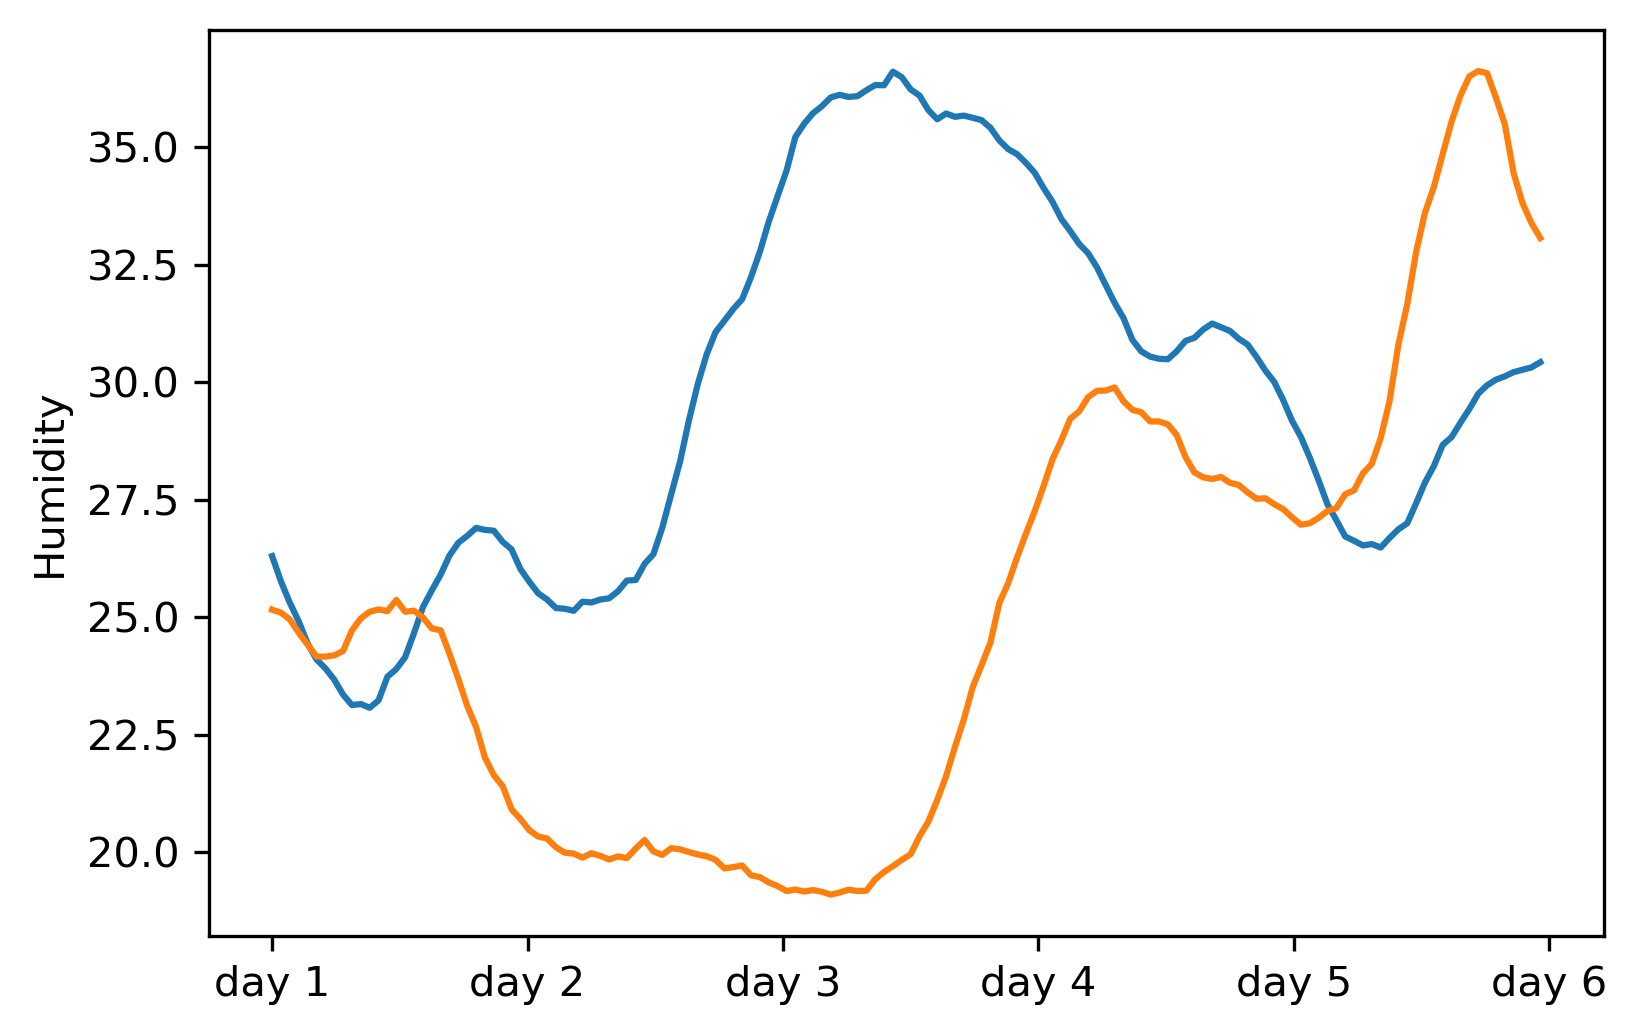

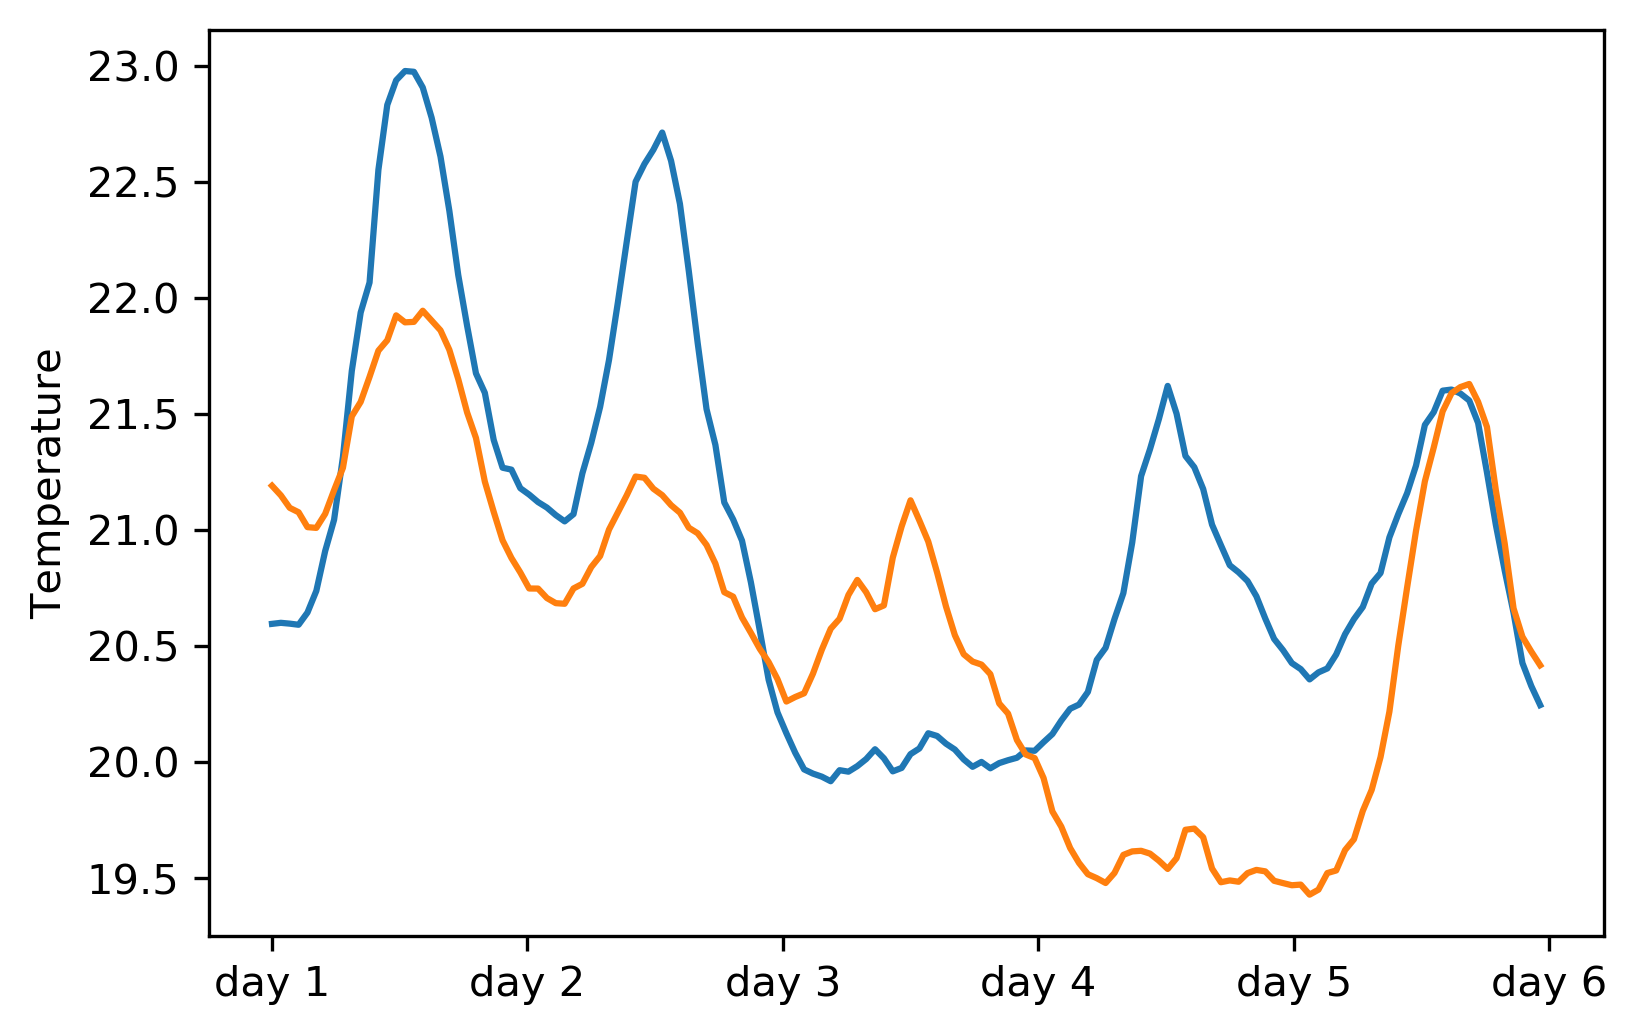

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(F)

print(kmeans.inertia_)

for i in range(2):
    plt.plot(np.mean(ts_array_H[np.where(kmeans.labels_ == i)], axis=0))
    plt.xticks([(ts_size/5 * i ) for i in range(6)], ['day 1','day 2','day 3','day 4','day 5','day 6'])
    plt.ylabel('Humidity')
    
plt.show()
for i in range(2):
    plt.plot(np.mean(ts_array_T[np.where(kmeans.labels_ == i)], axis=0))
    plt.xticks([(ts_size/5 * i ) for i in range(6)], ['day 1','day 2','day 3','day 4','day 5','day 6'])
    plt.ylabel('Temperature')
plt.show()

In [22]:
week1o2 = lambda ts : 0 if ts['date'][ts.index[0]].day == 12 else 1
labels = [week1o2(ts) for ts in week_list]
pd.crosstab(pd.Series(labels), pd.Series(kmeans.labels_), colnames=['weeks'], rownames=['Clusters'])
    

weeks      0   1
Clusters        
0         50   0
1          0  50

#### using tfresh

In [23]:
ts_list = []
for temp in week_list:
    ts = temp[['Temperature','Humidity']].copy()
    ts_list.append(ts)
ts_list[0]

Temperature   Humidity
177     20.600000  25.395000
417     20.500000  22.700000
443     20.500000  22.895000
494     20.566667  22.133333
518     20.666667  22.166667
...           ...        ...
6976    20.500000  30.390000
6995    20.500000  30.390000
7036    20.390000  30.200000
7150    20.200000  30.500000
7174    20.150000  30.600000

[144 rows x 2 columns]

In [24]:



ts_array_T = []
ts_array_H = []
ts_size = len(ts_list[0])
for ts in ts_list:
    ts_array_T.append(np.array(ts['Temperature']).reshape(ts_size,))
    ts_array_H.append(np.array(ts['Humidity']).reshape(ts_size,))
ts_array_T = np.array(ts_array_T)
ts_array_H = np.array(ts_array_H)
ts_array_T.shape

ts_array = []

for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,2))
ts_array = np.array(ts_array)
ts_array.shape
    

(100, 144, 2)

In [25]:
from tslearn.utils import from_tsfresh_dataset, to_tsfresh_dataset
ts_array = to_tsfresh_dataset(ts_array)
ts_array.shape

(14400, 4)

In [26]:
print(ts_array)

     id  time      dim_0      dim_1
0     0     0  20.600000  25.395000
1     0     1  20.500000  22.700000
2     0     2  20.500000  22.895000
3     0     3  20.566667  22.133333
4     0     4  20.666667  22.166667
..   ..   ...        ...        ...
139  99   139  20.445000  33.022500
140  99   140  20.390000  33.000000
141  99   141  20.390000  32.900000
142  99   142  20.390000  33.000000
143  99   143  20.390000  32.900000

[14400 rows x 4 columns]


In [27]:
from tsfresh.feature_extraction import extract_features
features = extract_features(timeseries_container=ts_array, column_id='id')

Feature Extraction: 100%|██████████| 38/38 [00:07<00:00,  5.08it/s]


In [28]:
features.shape

(100, 2289)

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
features_values = scaler.fit_transform(features.values)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


##### Day length

In [30]:

#for part
ts_list = []
for temp in day_split:
    ts = temp[['Temperature','Humidity']].copy()
    ts_list.append(ts)


F = pd.DataFrame()
for ts in ts_list:
    F = F.append( pd.DataFrame.from_dict(calculate_features(ts)), ignore_index = True)

ts_array_T = []
ts_array_H = []
ts_size = len(ts_list[0])
for ts in ts_list:
    ts_array_T.append(np.array(ts['Temperature']).reshape(ts_size,))
    ts_array_H.append(np.array(ts['Humidity']).reshape(ts_size,))
ts_array_T = np.array(ts_array_T)
ts_array_H = np.array(ts_array_H)
ts_array_T.shape

(360, 40)

3893.824469139656
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 2 1
 0 2 1 2 2 1 0 2 1 0 2 1 0 2 1 0 2 1 2 2 1 0 2 1 2 2 1 0 2 1 0 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 2 0 0 2 0 0 2 0 0 2 0 0 1 0 0 1 1 0 1 0 0
 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0]


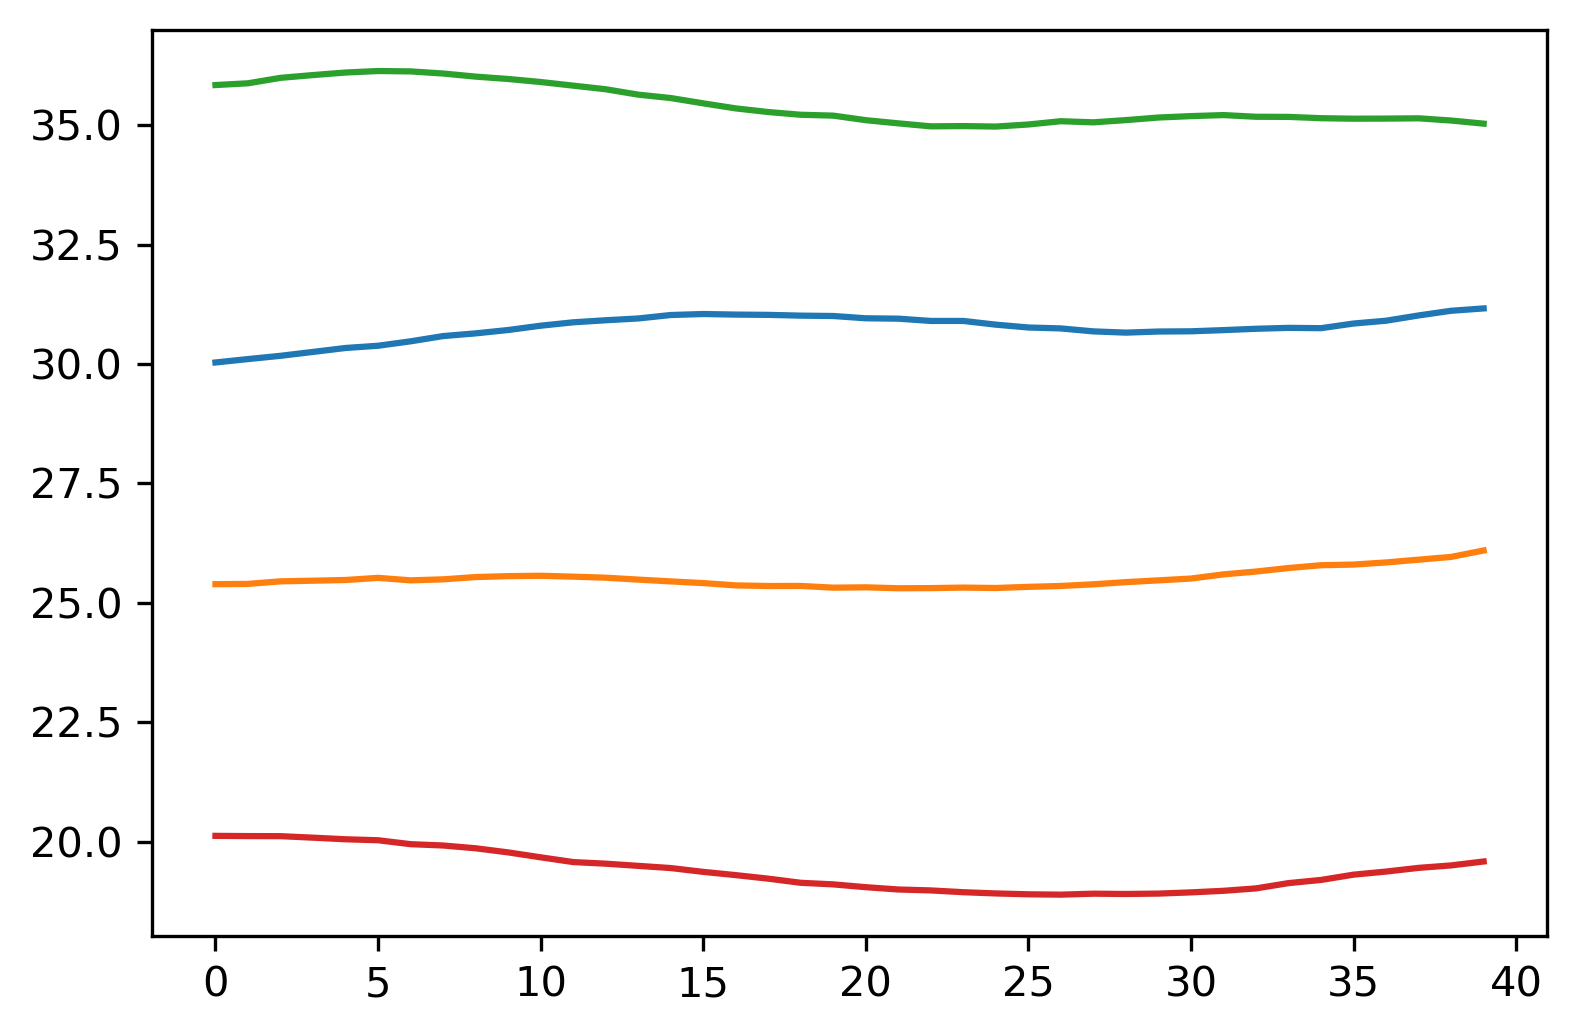

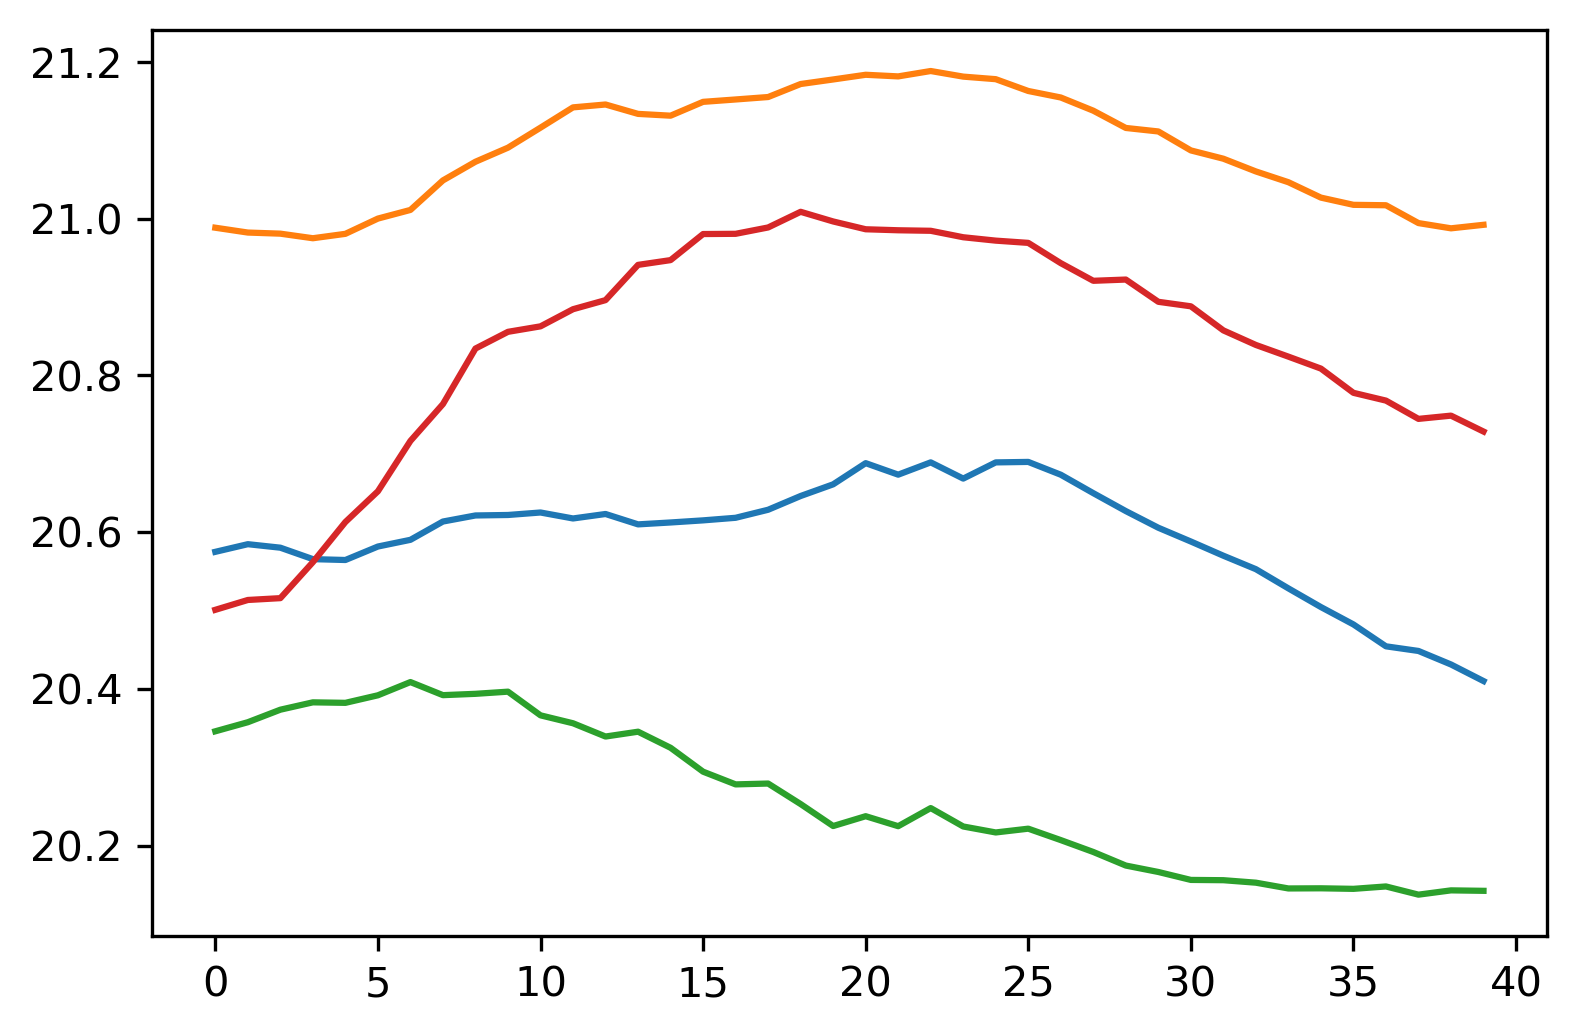

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(F)

print(kmeans.inertia_)
print(kmeans.labels_)
for i in range(4):
    plt.plot(np.mean(ts_array_H[np.where(kmeans.labels_ == i)], axis=0))
    
    
plt.show()
for i in range(4):
    plt.plot(np.mean(ts_array_T[np.where(kmeans.labels_ == i)], axis=0))
    
plt.show()


## Compression Based

In [32]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN
import zlib
import string

In [33]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))



In [34]:
ts_list = []
for temp in week_list:
    ts = temp['Temperature'].copy()
    ts_list.append((ts-ts.mean())/ts.std())

ts_array = []
ts_size = len(week_list[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,))
    
ts_array = np.array(ts_array)
X = ts_array
X.shape

(100, 144)

In [35]:
M = pairwise_distances(X.reshape(X.shape[0], X.shape[1]), metric=cdm_dist)
print(M.shape, X.shape)

(100, 100) (100, 144)


In [36]:
M.shape

(100, 100)

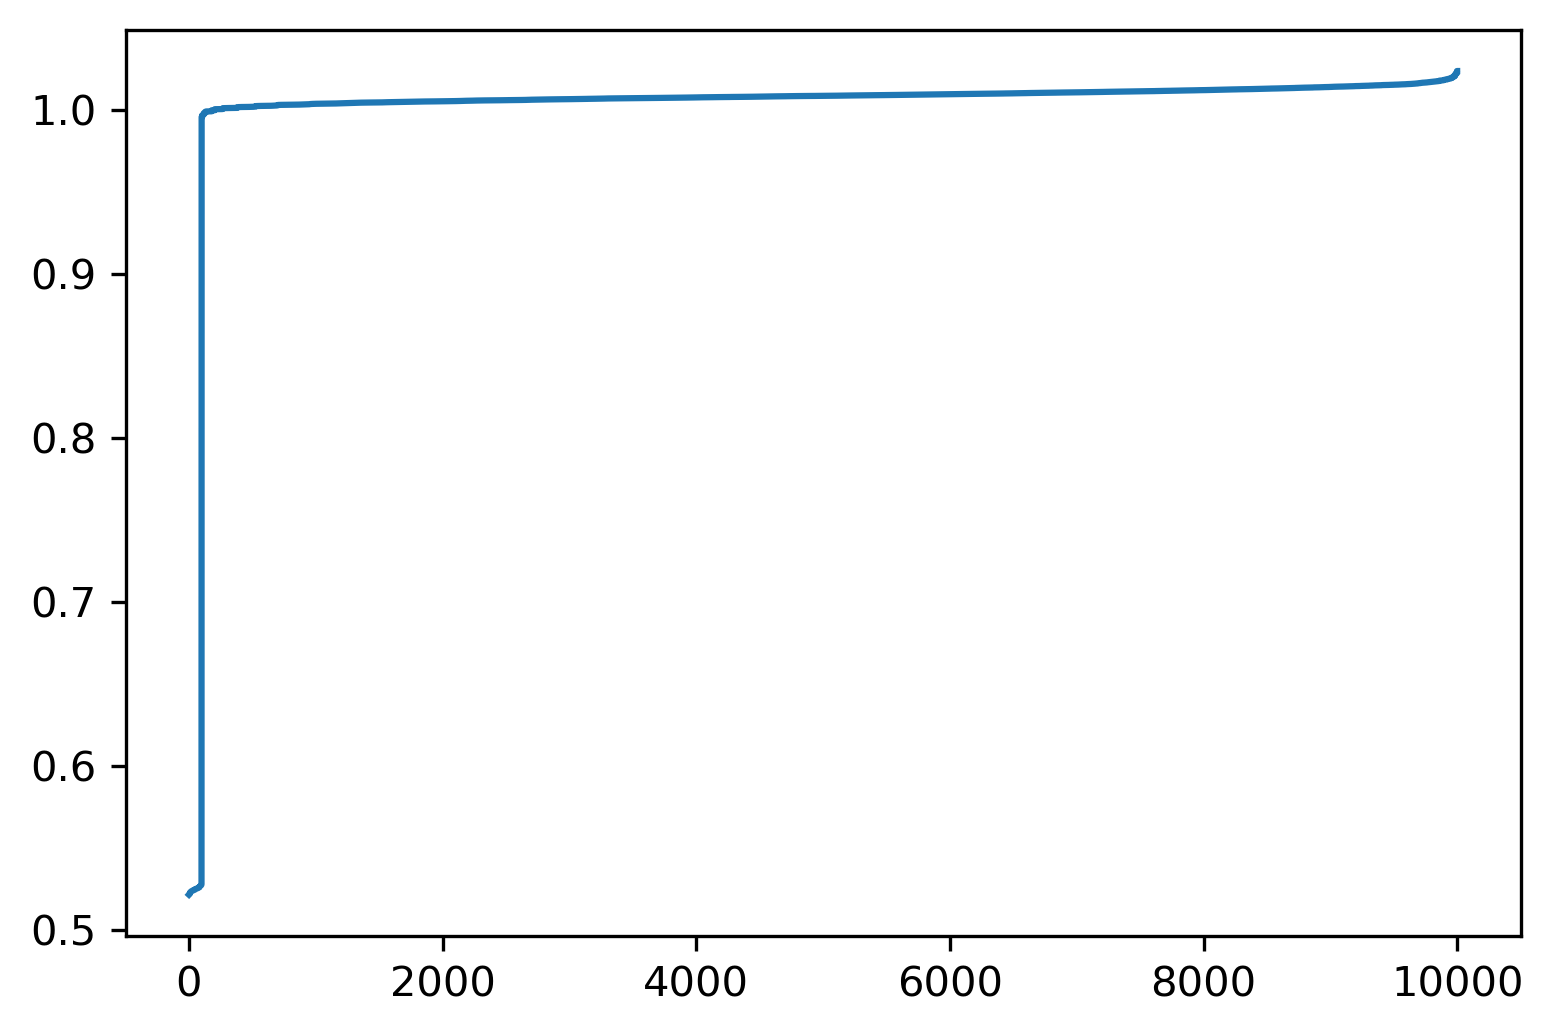

In [37]:
plt.plot(sorted(M.ravel()))
plt.show()

In [38]:
dbscan = DBSCAN(eps=0.2, min_samples=9, metric='precomputed')
dbscan.fit(M)
print(dbscan.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


## Aproximation based 

In [39]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

from tslearn.clustering import TimeSeriesKMeans

In [40]:
ts_list = []
for temp in week_list:
    ts = temp['Temperature'].copy()
    ts_list.append((ts-ts.mean())/ts.std())

ts_array = []
ts_size = len(week_list[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,))
    
ts_array = np.array(ts_array)
X = ts_array
X.shape

(100, 144)

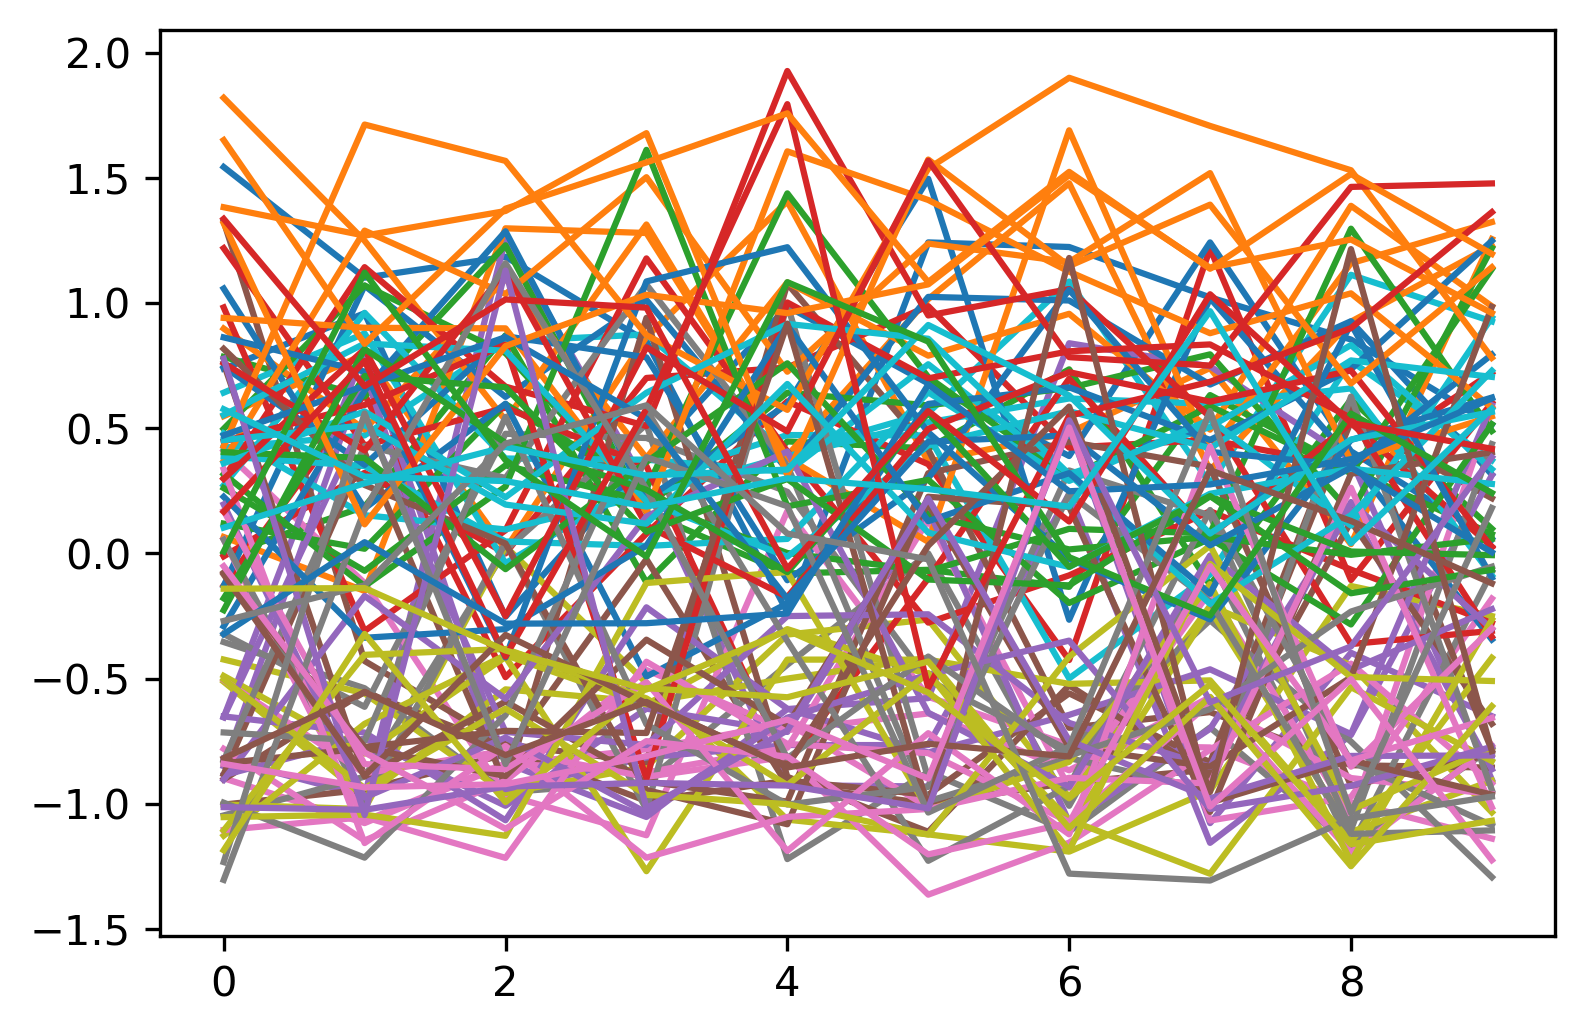

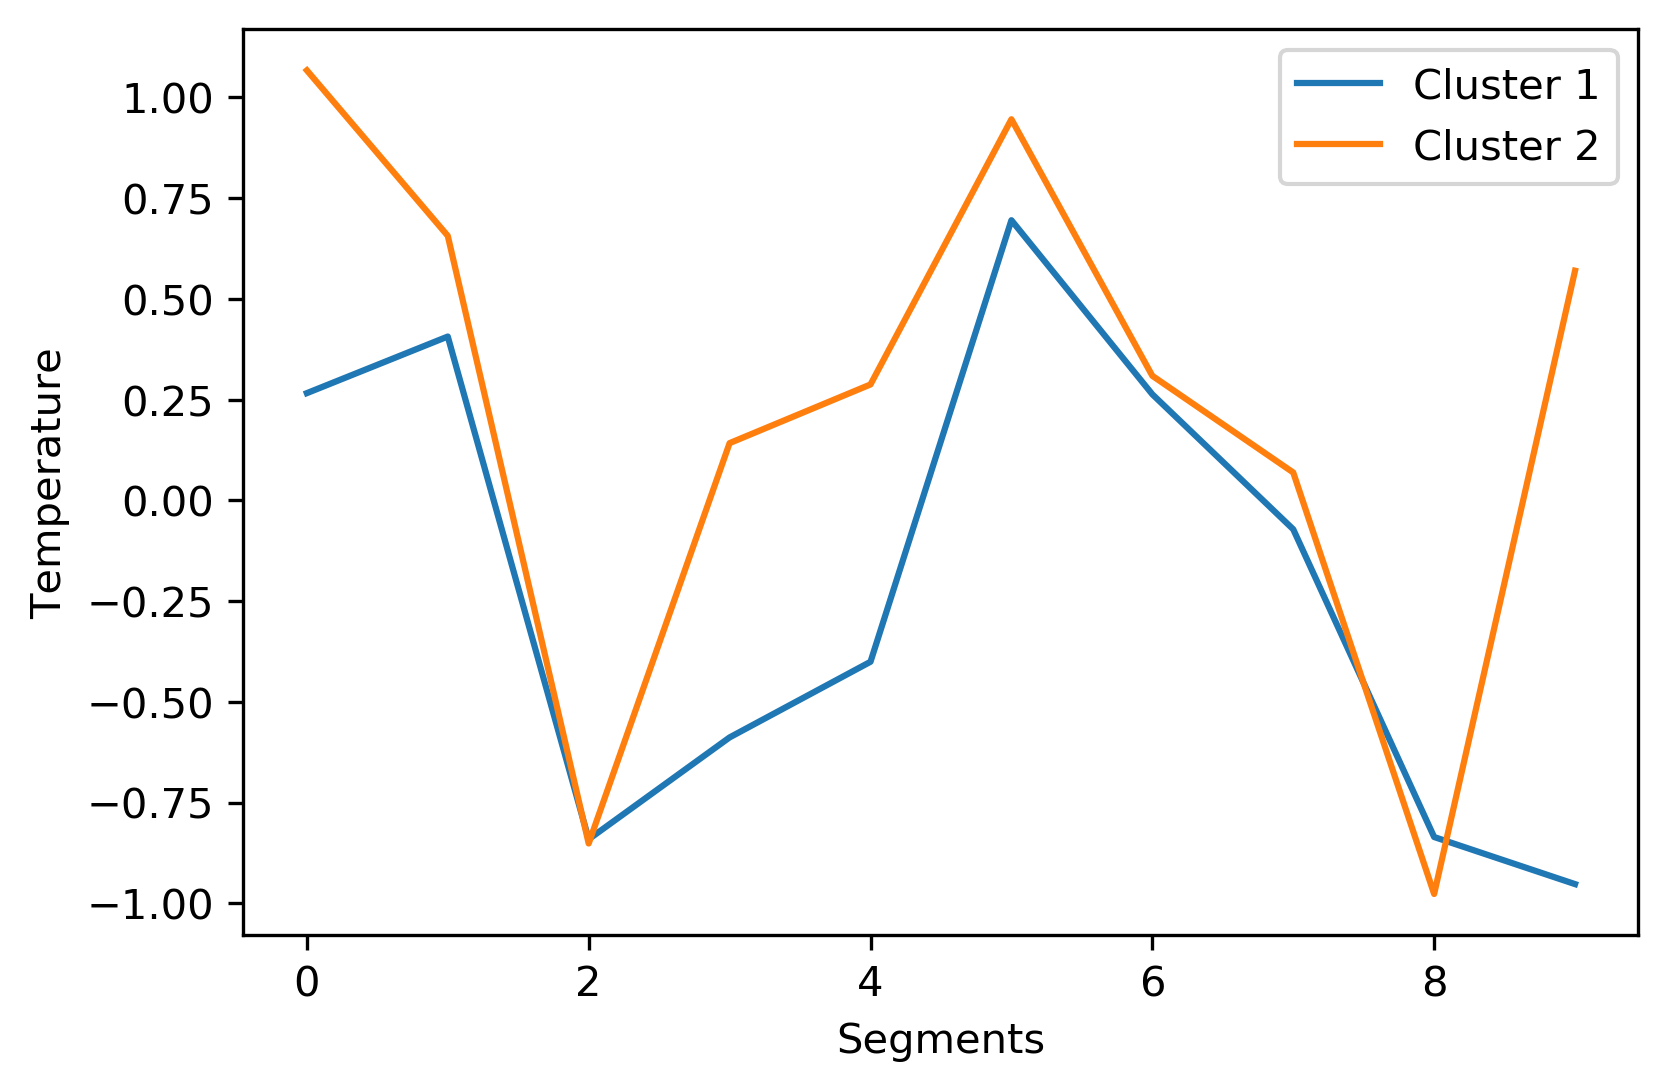

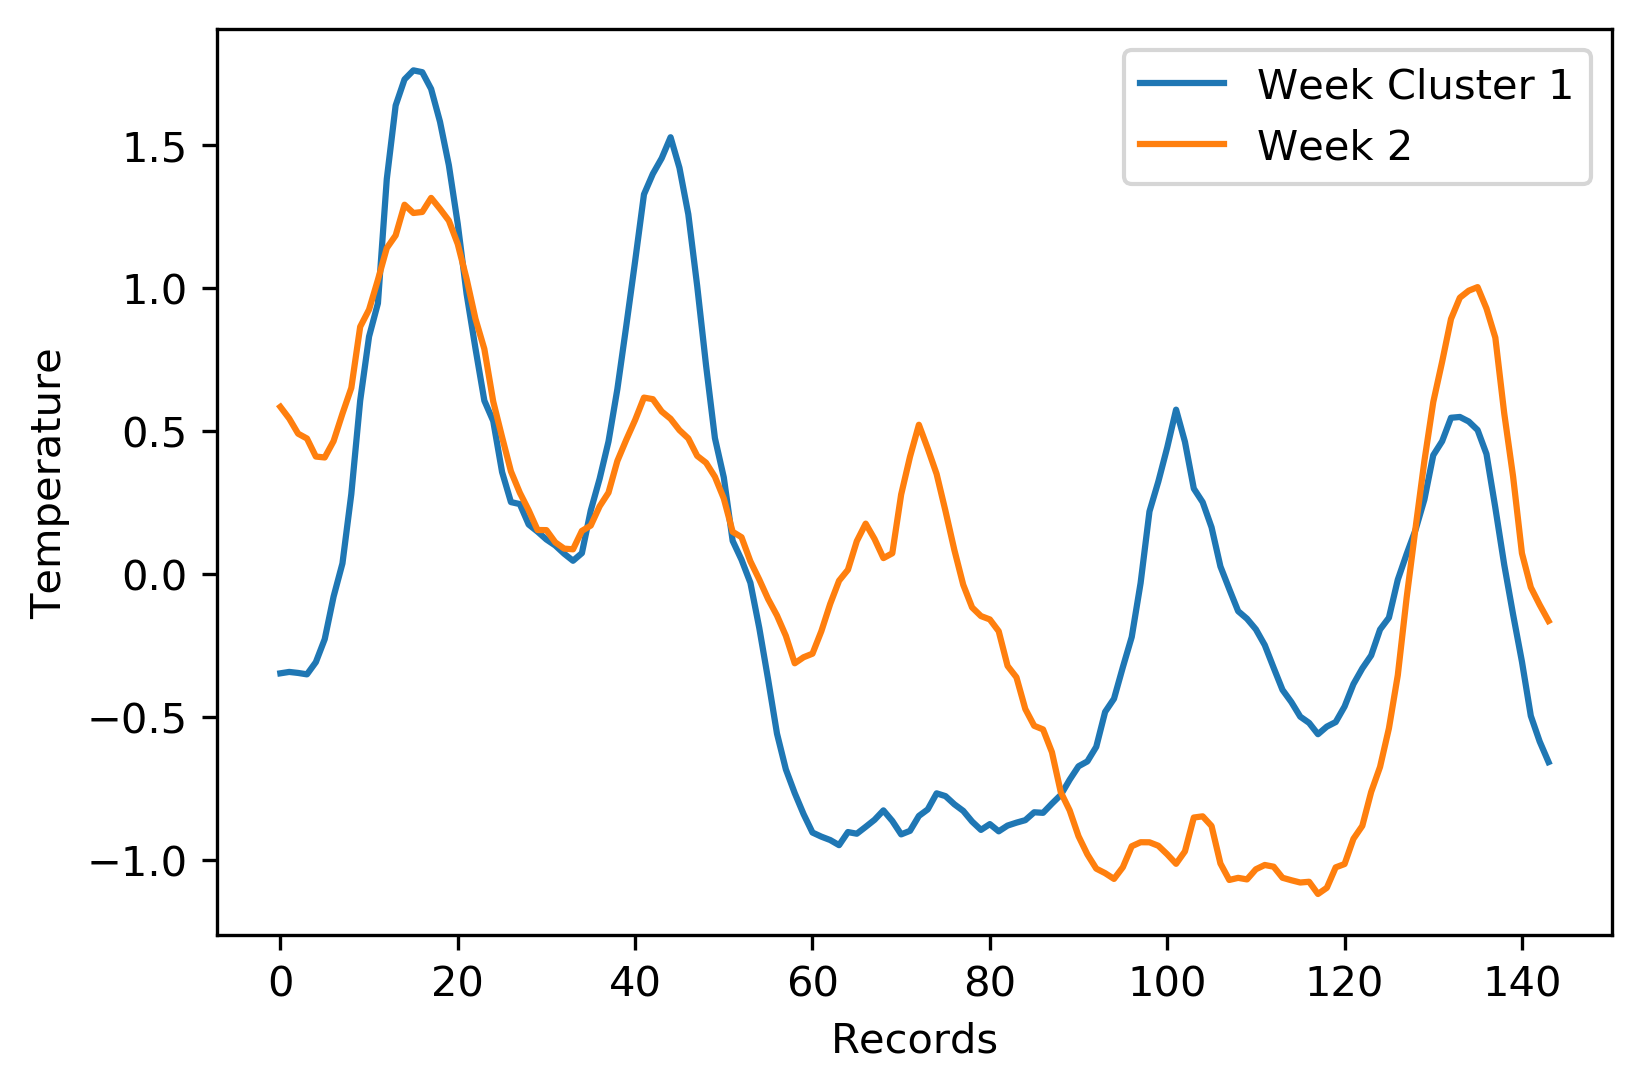

weeks      0   1
Clusters        
0          0  50
1         50   0

In [41]:

n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X)
#X_paa = paa.inverse_transform(X_paa)
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.show()

km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=5, random_state=0)
km.fit(X_paa)

plt.plot(km.cluster_centers_.reshape(X_paa.shape[1], 2))
plt.legend(['Cluster 1','Cluster 2'])
plt.xlabel('Segments')
plt.ylabel('Temperature')
plt.show()

for i in range(2):
    plt.plot(np.mean(X[np.where(km.labels_ == i)[0]], axis=0))
plt.legend(['Week Cluster 1','Week 2'])
plt.xlabel('Records')
plt.ylabel('Temperature')
plt.show()


week1o2 = lambda ts : 1 if ts['date'][ts.index[0]].day == 12 else 0
labels = [week1o2(ts) for ts in week_list]
pd.crosstab(pd.Series(labels), pd.Series(km.labels_), colnames=['weeks'], rownames=['Clusters'])

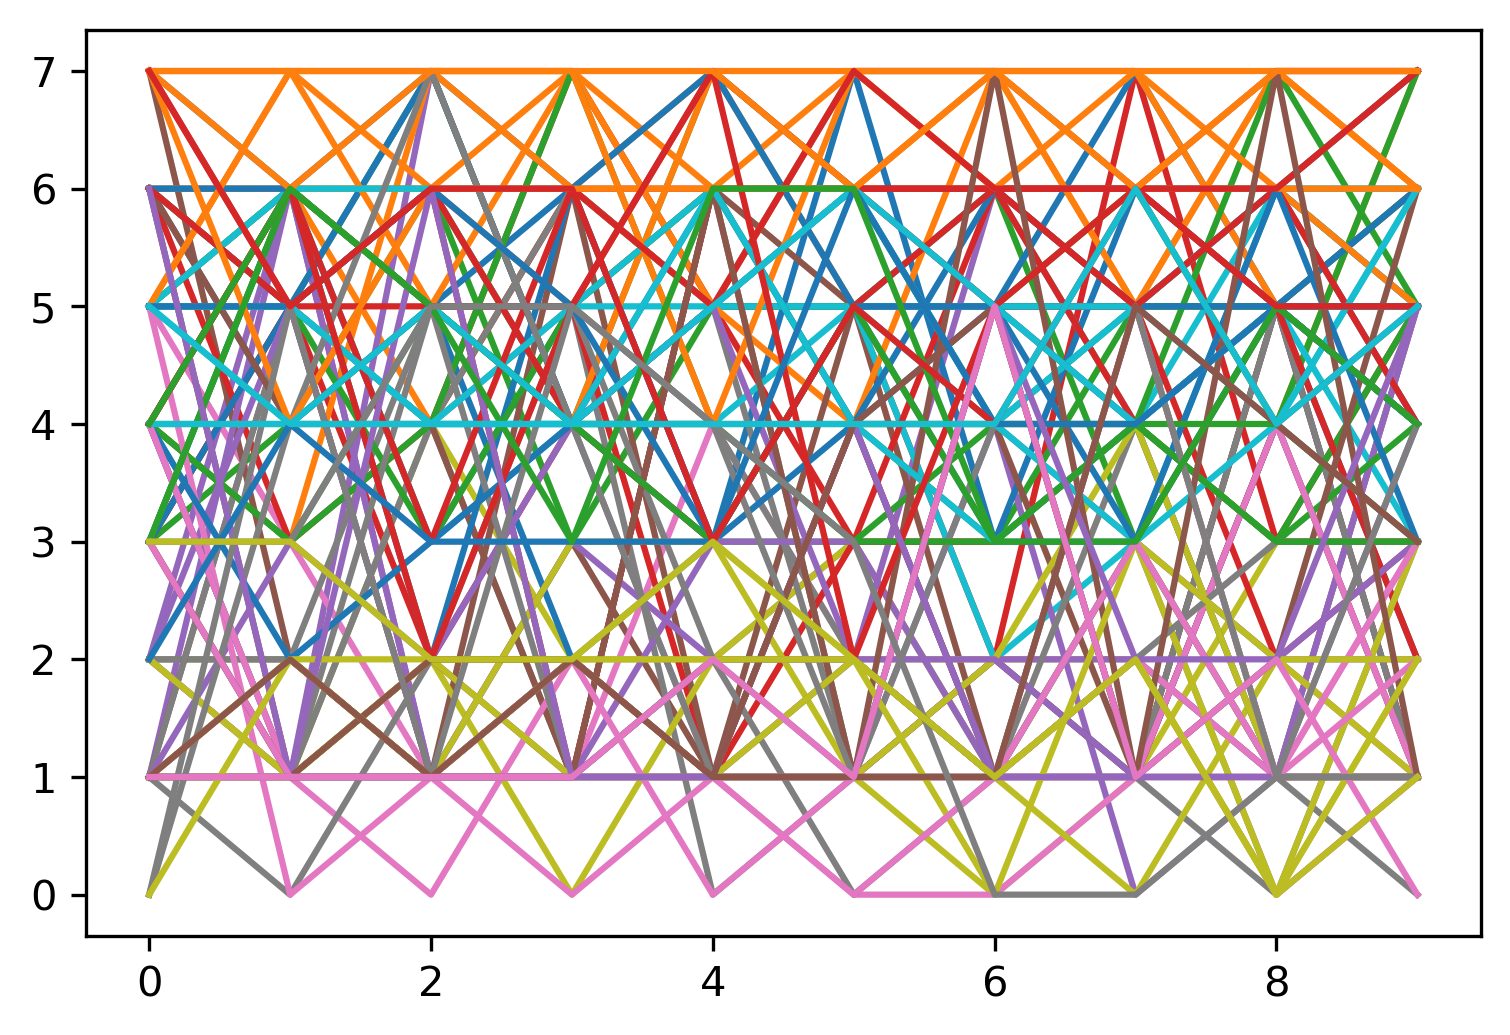

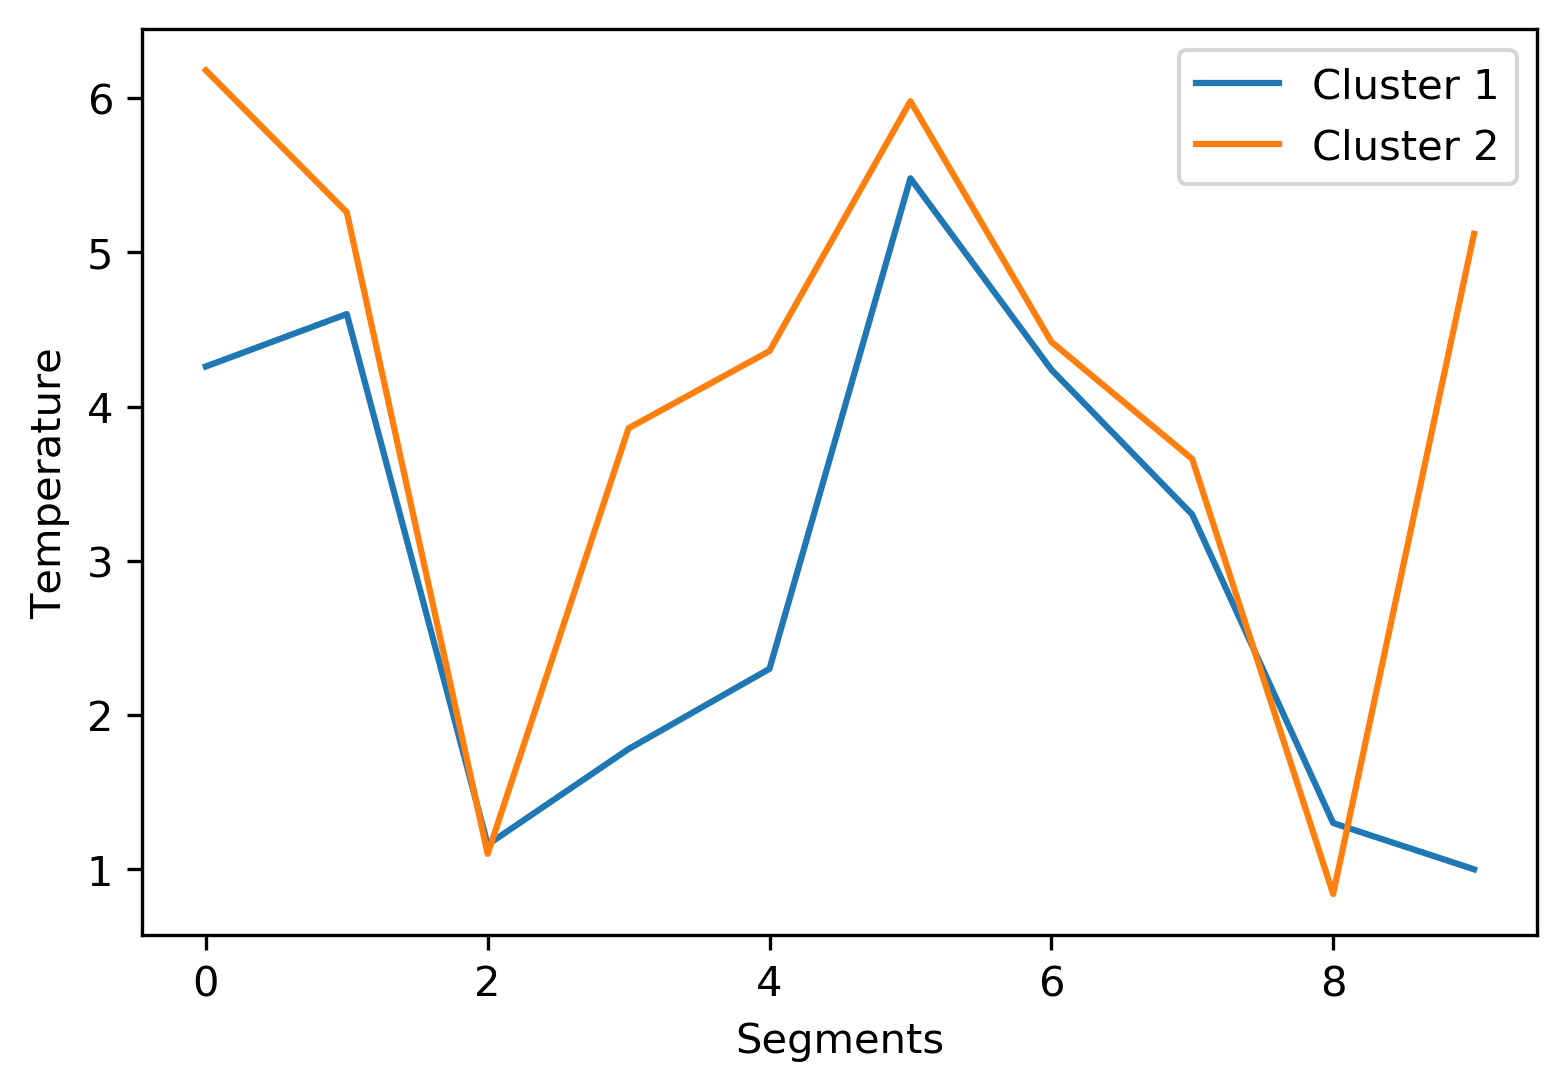

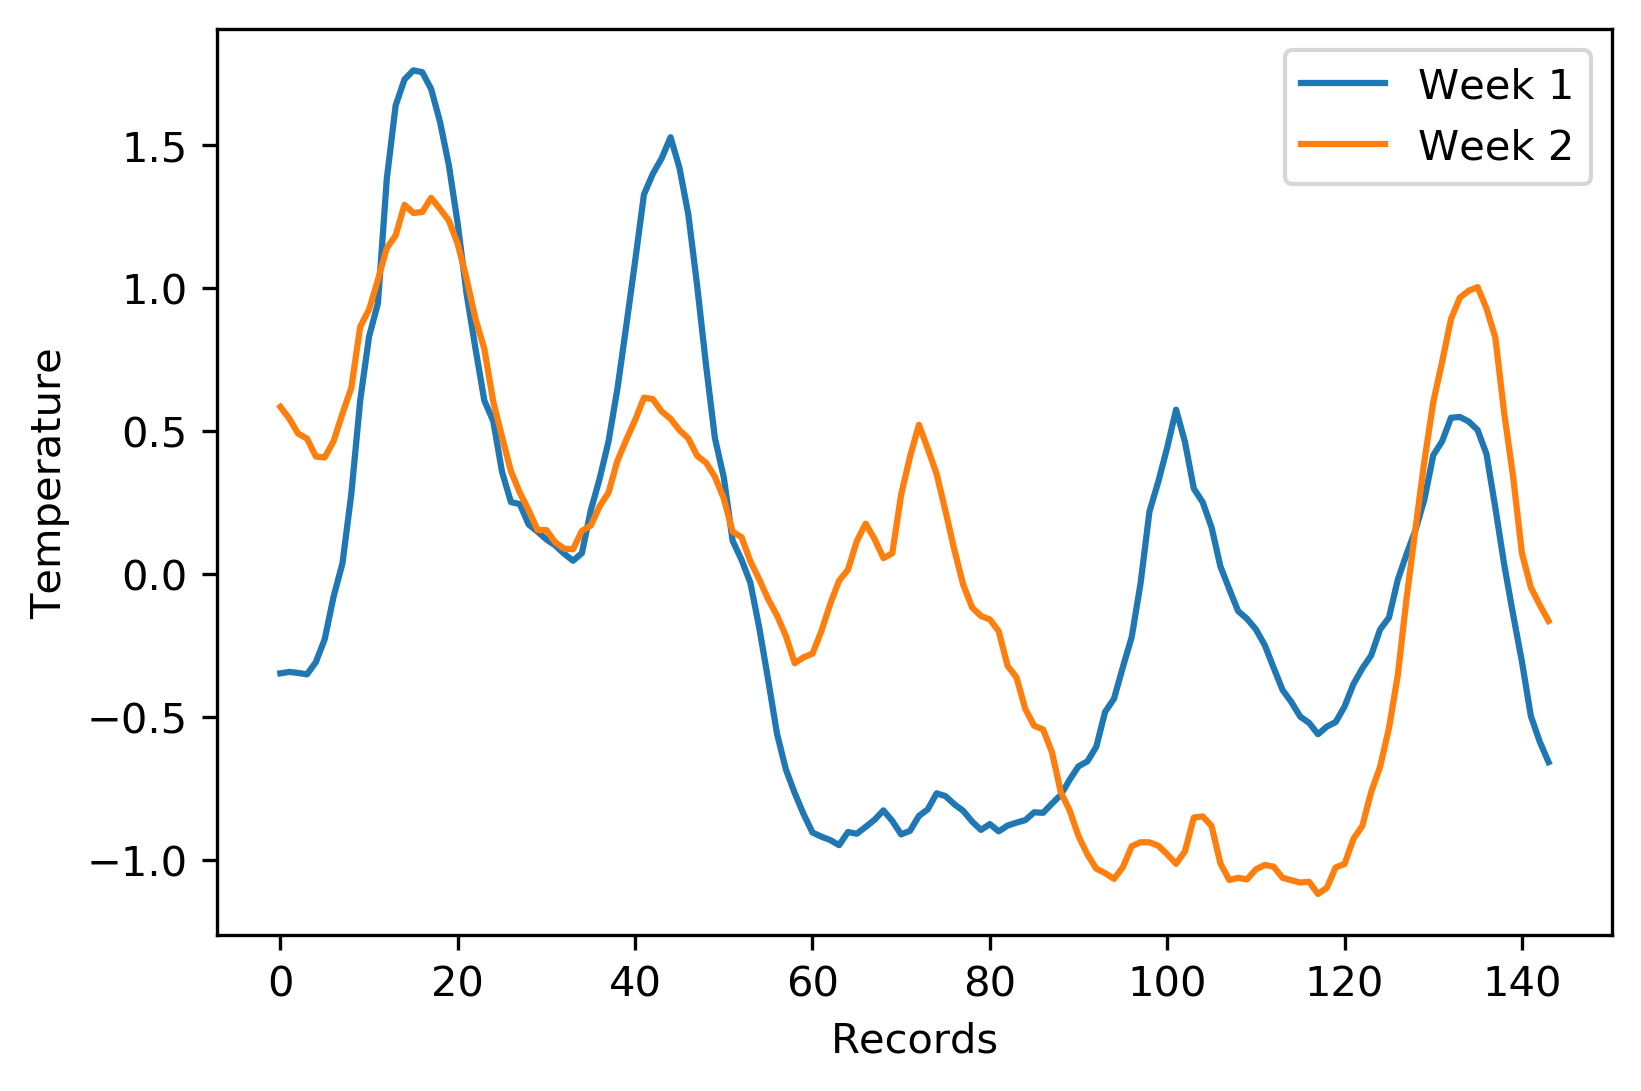

weeks      0   1
Clusters        
0          0  50
1         50   0

In [42]:
n_sax_symbols = 8
n_saa_segments = 10
SAA = SymbolicAggregateApproximation(n_segments=n_saa_segments, alphabet_size_avg=n_sax_symbols)
X_saa = SAA.fit_transform(X)

plt.plot(X_saa.reshape(X_saa.shape[1], X_paa.shape[0]))
plt.show()

km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=5, random_state=0)
km.fit(X_saa)

plt.plot(km.cluster_centers_.reshape(X_saa.shape[1], 2))
plt.legend(['Cluster 1','Cluster 2'])
plt.xlabel('Segments')
plt.ylabel('Temperature')
plt.show()

for i in range(2):
    plt.plot(np.mean(X[np.where(km.labels_ == i)[0]], axis=0))
plt.legend(['Week 1','Week 2'])
plt.xlabel('Records')
plt.ylabel('Temperature')
plt.show()



week1o2 = lambda ts : 1 if ts['date'][ts.index[0]].day == 12 else 0
labels = [week1o2(ts) for ts in week_list]
pd.crosstab(pd.Series(labels), pd.Series(km.labels_), colnames=['weeks'], rownames=['Clusters'])

In [43]:
n_sax_symbols_avg = 8
n_sax_symbols_slope = 4
one_d_sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,alphabet_size_avg=n_sax_symbols_avg)

X_ods = one_d_sax.fit_transform(X)

X_ods.shape

(100, 10, 1)

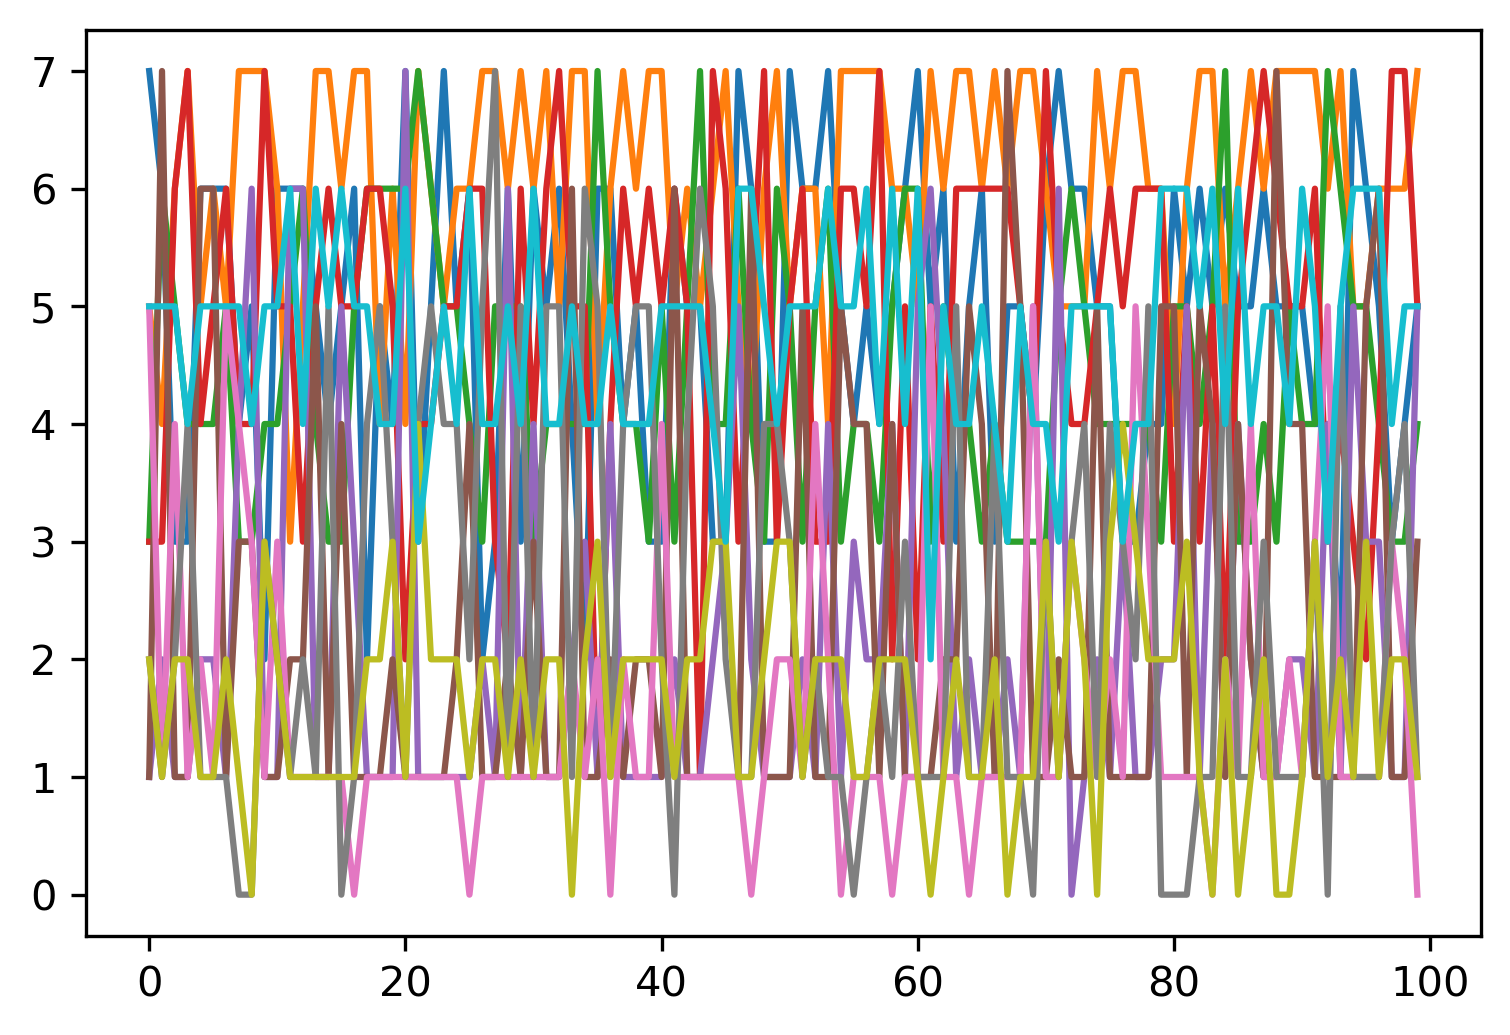

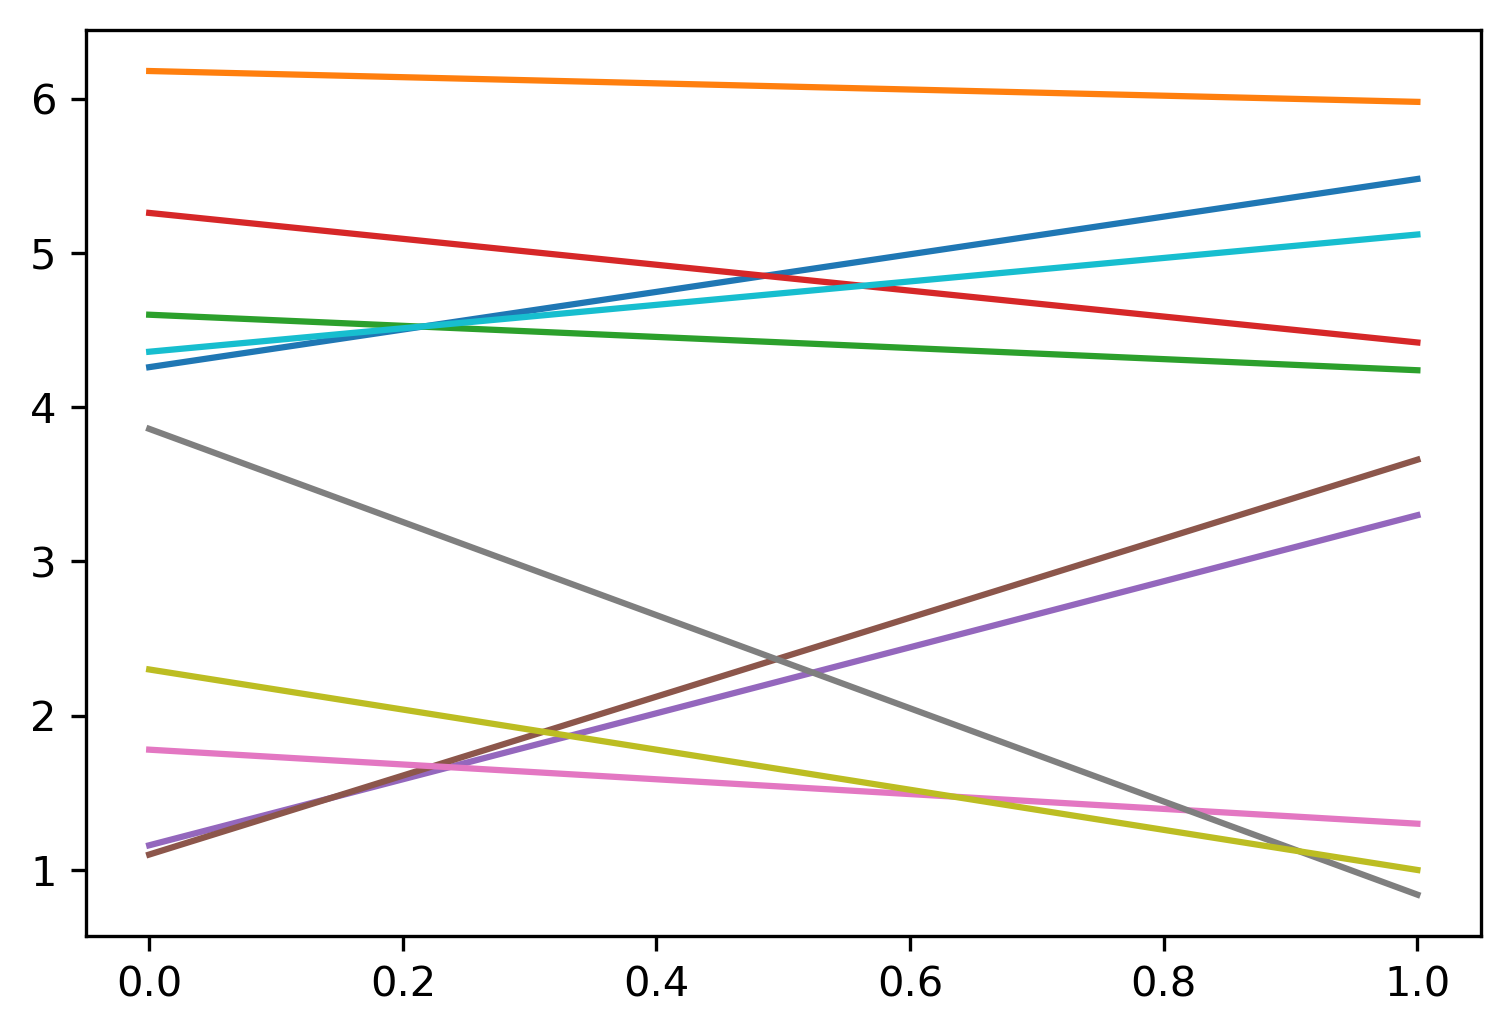

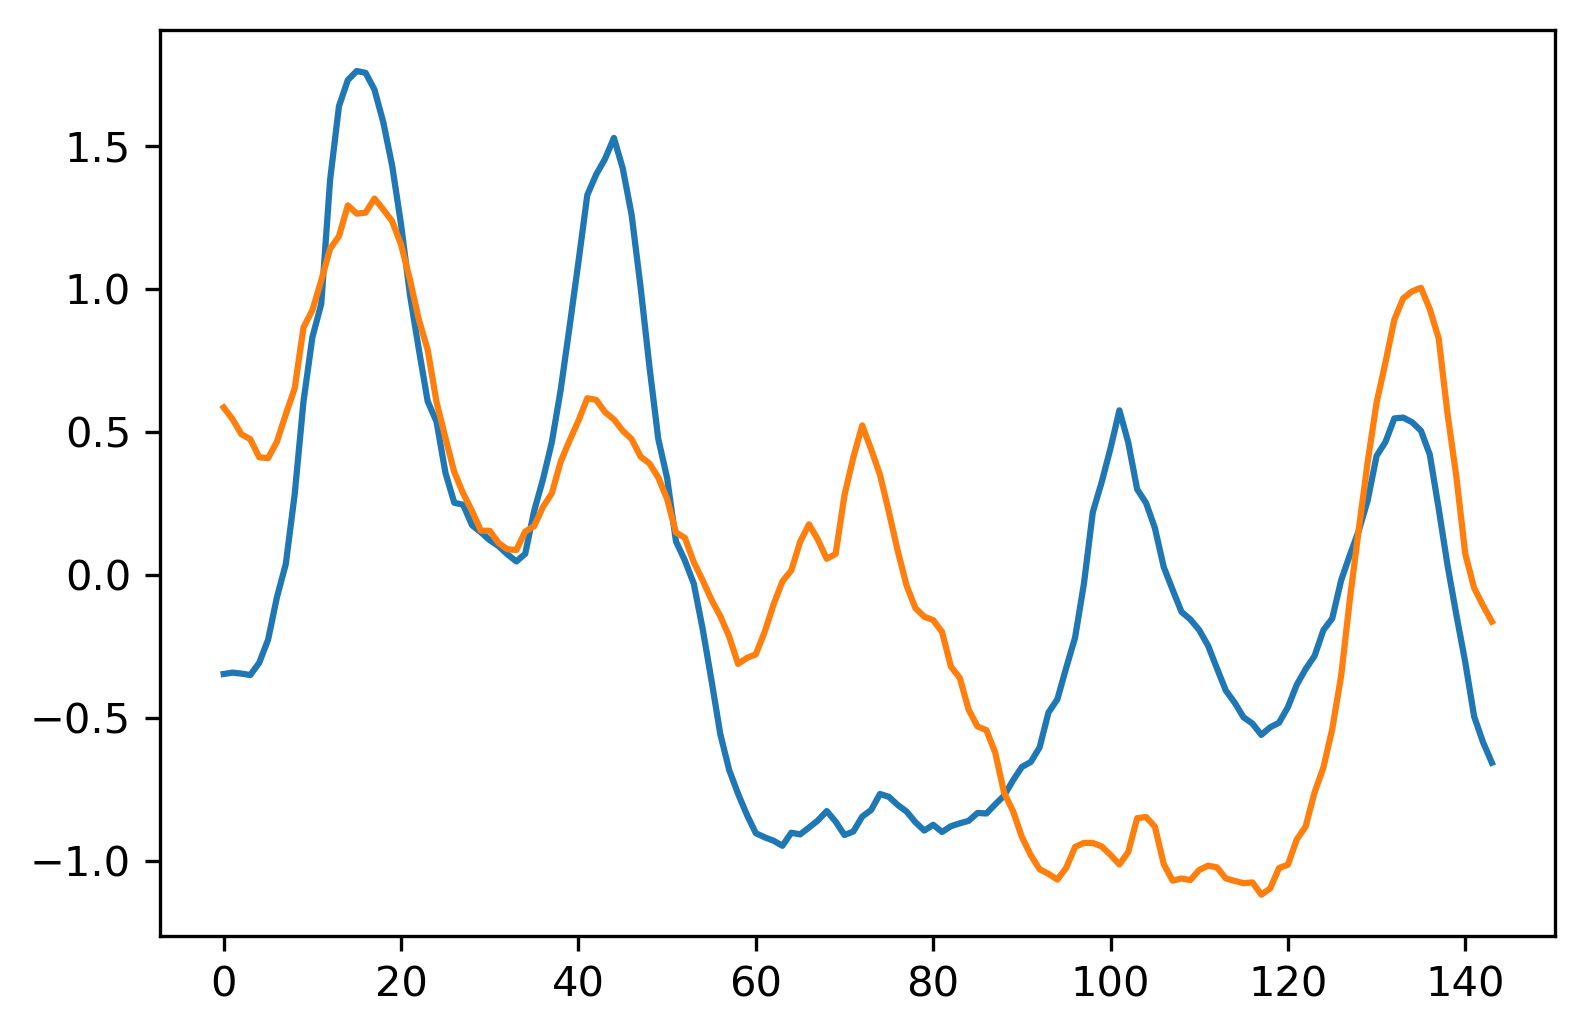

In [44]:
plt.plot(X_ods.reshape(X_ods.shape[0], X_ods.shape[1]))
plt.show()

km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=5, random_state=0)
km.fit(X_ods)

plt.plot(km.cluster_centers_.reshape(km.cluster_centers_.shape[0], km.cluster_centers_.shape[1]))
plt.show()

for i in range(2):
    plt.plot(np.mean(X[np.where(km.labels_ == i)[0]], axis=0))
plt.show()